In [117]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [118]:
 #Reading data
df=pd.read_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\INDIA MASKTWEETS.csv',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0))
df.head()

,created_at,text,screen_name,location
0,19-09-2021 06:25,b'#Loot\nGet Pharmeasy Plus 3 Months Membershi...,b'on9deals',"b'Mumbai, India'"
1,19-09-2021 04:45,"b'@traffic_jpr Is face mask still mandatory, i...",b'mrinaljaipur',"b'Jaipur, India'"
2,19-09-2021 04:22,b'Don\xe2\x80\x99t let your guard down. The #C...,b'MayaSharmaNDTV',"b'Bengaluru, India'"
3,18-09-2021 12:45,"b'By using Mask and Getting Vaccinated, you un...",b'DoITCRaj',"b'Jaipur, India'"
4,18-09-2021 08:28,"b'On an average , 4 out of 10 people I see ins...",b'sajanjohn',"b'Bengaluru, India'"


In [119]:
df.columns
tweet=df.copy()

In [120]:
tweet.shape

(4399, 4)

In [121]:
#check missing values
tweet.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       created_at   text  screen_name  location
0          False  False        False     False
1          False  False        False     False
2          False  False        False     False
3          False  False        False     False
4          False  False        False     False
...          ...    ...          ...       ...
4394       False  False        False     False
4395       False  False        False     False
4396       False  False        False     False
4397       False  False        False     False
4398       False  False        False     False

[4399 rows x 4 columns]>

In [122]:
# data preprocessing
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet['text'][i]).split()).lower()
tweet['text'].head()

0    b loot nget pharmeasy plus 3 months membership...
1    b jpr is face mask still mandatory in private ...
2    b don xe2 x80 x99t let your guard down the cov...
3    b by using mask and getting vaccinated you unl...
4    b on an average 4 out of 10 people i see insid...
Name: text, dtype: object

In [123]:
#some more preprocessing deletion X..../b 
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(x[A-Za-z0-9])|([0-9])|(b[' '])", " ", tweet['text'][i]).split()).lower()
tweet['text'].head(30)

0     loot nget pharmeasy plus months membership at ...
1     jpr is face mask still mandatory in private ca...
2     don t let your guard down the covid third wave...
3     by using mask and getting vaccinated you unloc...
4     on an average out of people i see inside a hos...
5     precautions against covid as suggested by the ...
6     satiesh covid as suggested by the government o...
7     jharkhand has no covid guidelines right now at...
8     dear nflights mein mask face shield amp ppe go...
9     against covid as suggested by the government o...
10    i am fully vaccinated ni wear mask when i step...
11    vaccine podu mask podu msdhoni urges fans to t...
12    mask sanitize and don t socialize nget your do...
13    all the covid warriors must be happy seeing th...
14    the speaker has removed the mask only for the ...
15    bjp filed a complaint against west bengal cm m...
16    maskup nirmalasitharaman when fm is not using ...
17    few things to remember about wearing mask 

In [124]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

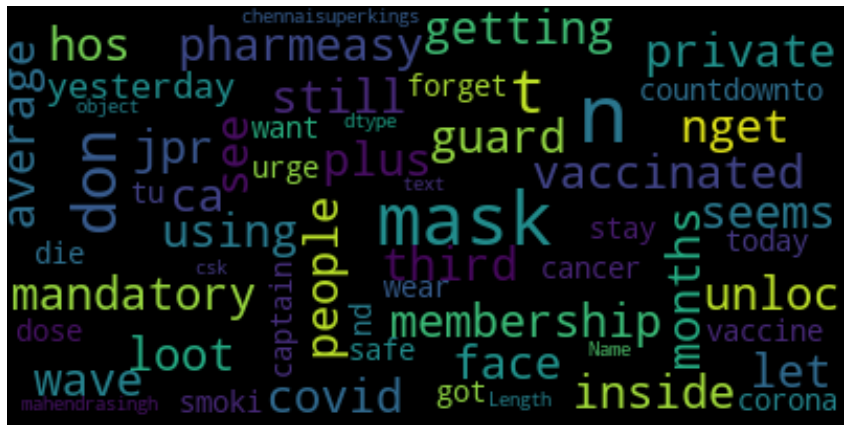

In [15]:
#wordcloud without removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

In [16]:
#Removing Stop Words
tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head() 

0    loot nget pharmeasy plus months membership re ...
1    jpr face mask still mandatory private car full...
2    don t let guard covid third wave e ected make ...
3    using mask getting vaccinated unlock chances g...
4    average people see inside hospital public plac...
Name: text, dtype: object

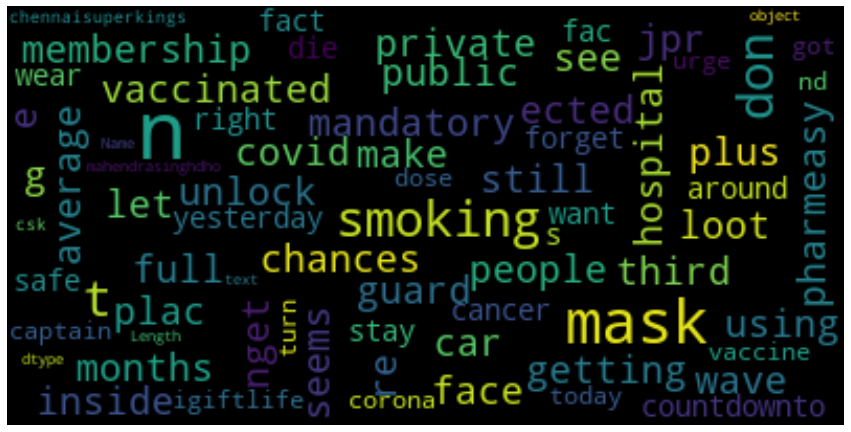

In [17]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

In [18]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,screen_name,location,sentiment,polarity
0,19-09-2021 06:25,loot nget pharmeasy plus months membership re ...,b'on9deals',"b'Mumbai, India'",neutral,0.0
1,19-09-2021 04:45,jpr face mask still mandatory private car full...,b'mrinaljaipur',"b'Jaipur, India'",neutral,0.0
2,19-09-2021 04:22,don t let guard covid third wave e ected make ...,b'MayaSharmaNDTV',"b'Bengaluru, India'",neutral,0.0
3,18-09-2021 12:45,using mask getting vaccinated unlock chances g...,b'DoITCRaj',"b'Jaipur, India'",positive,0.45
4,18-09-2021 08:28,average people see inside hospital public plac...,b'sajanjohn',"b'Bengaluru, India'",negative,-0.075


In [19]:
tweet['sentiment'].value_counts()

neutral     2886
positive    1159
negative     354
Name: sentiment, dtype: int64

In [20]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.head(10)
sentiment_df.to_csv(r"C:\Users\DELL\Desktop\mask covid19\mask dataset/indiatweet with text pol sent.csv")

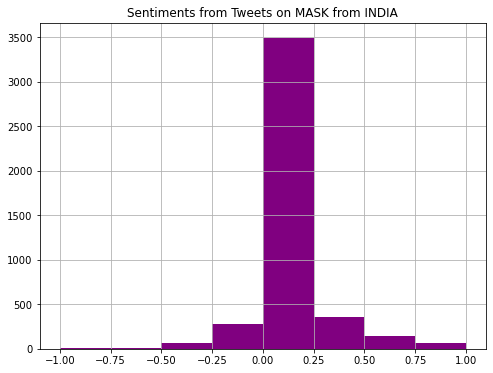

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on MASK from INDIA")
plt.show()

In [22]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(4399,)

In [23]:
x=tweet['text'].values
x.shape

(4399,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(2199,)
(2199,)
(2200,)


(2200,)

neutral     2886
positive    1159
negative     354
Name: sentiment, dtype: int64


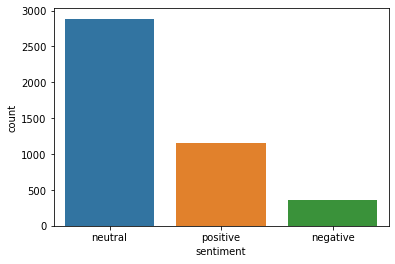

In [26]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

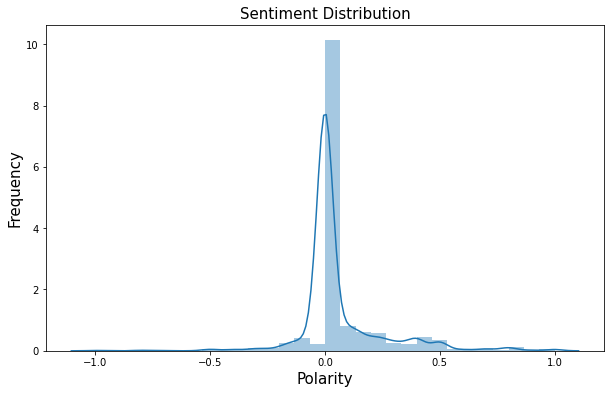

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

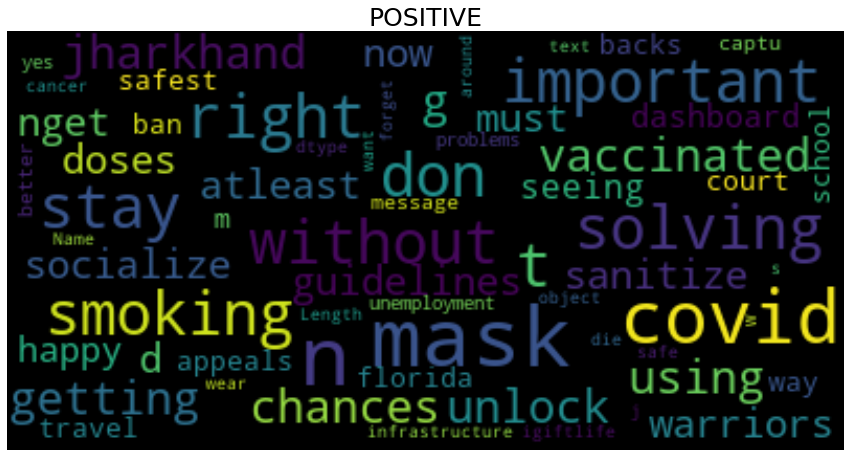

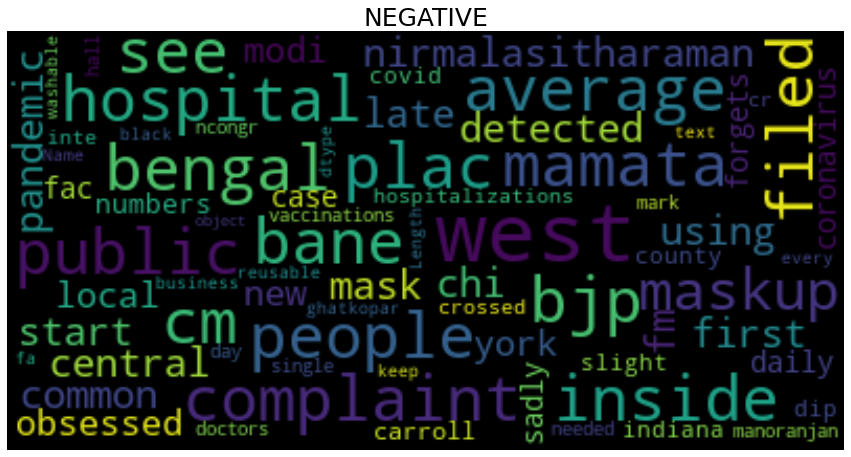

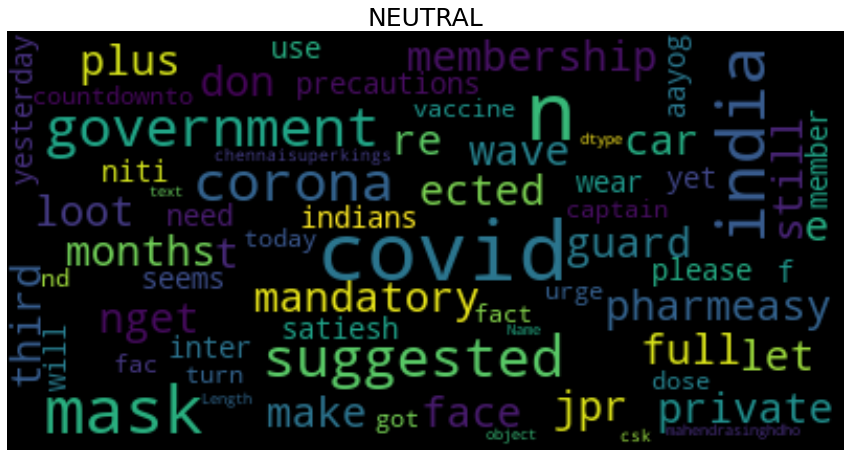

In [28]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [29]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

,created_at,text,screen_name,location,polarity
sentiment,,,,,
negative,18-09-2021 08:2817-09-2021 06:0017-09-2021 02:...,average people see inside hospital public plac...,b'sajanjohn'b'briflynews'b'ankitcts1'b'NewsLiv...,"b'Bengaluru, India'b'India'b'Noida, India'b'Gu...",-65.418323
neutral,19-09-2021 06:2519-09-2021 04:4519-09-2021 04:...,loot nget pharmeasy plus months membership re ...,b'on9deals'b'mrinaljaipur'b'MayaSharmaNDTV'b'P...,"b'Mumbai, India'b'Jaipur, India'b'Bengaluru, I...",0.000000
positive,18-09-2021 12:4518-09-2021 05:5417-09-2021 10:...,using mask getting vaccinated unlock chances g...,b'DoITCRaj'b'HinduUrjaa'b'HelpNowIndia'b'kunje...,"b'Jaipur, India'b'Patna, India'b'Mumbai, India...",325.448171


In [30]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [31]:
words

['loot',
 'nget',
 'pharmeasy',
 'plus',
 'months',
 'membership',
 're',
 'n',
 'nvisit',
 'membership',
 'jpr',
 'face',
 'mask',
 'still',
 'mandatory',
 'private',
 'car',
 'fully',
 'vaccinated',
 'driver',
 'passangers',
 'covid',
 'police',
 'don',
 't',
 'let',
 'guard',
 'covid',
 'third',
 'wave',
 'e',
 'ected',
 'make',
 'difference',
 'impact',
 'n',
 'nmask',
 'using',
 'mask',
 'getting',
 'vaccinated',
 'unlock',
 'chances',
 'getting',
 'free',
 'worries',
 'stay',
 'safe',
 'n',
 'n',
 'doitc',
 'average',
 'people',
 'see',
 'inside',
 'hospital',
 'public',
 'place',
 'wear',
 'mask',
 'nose',
 'precautions',
 'covid',
 'suggested',
 'government',
 'india',
 'interest',
 'custome',
 'satiesh',
 'covid',
 'suggested',
 'government',
 'india',
 'interest',
 'customers',
 'employee',
 'jharkhand',
 'covid',
 'guidelines',
 'right',
 'now',
 'atleast',
 'don',
 't',
 'appear',
 'picture',
 'cm',
 'dear',
 'nflights',
 'mein',
 'mask',
 'face',
 'shield',
 'amp',
 'ppe',

In [32]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

,word,frequency
0,n,4514
1,covid,1888
2,dose,1544
3,sep,1525
4,slots,1482
5,nage,1482
6,pincode,1459
7,ndate,1459
8,nfees,1459
9,f,1315


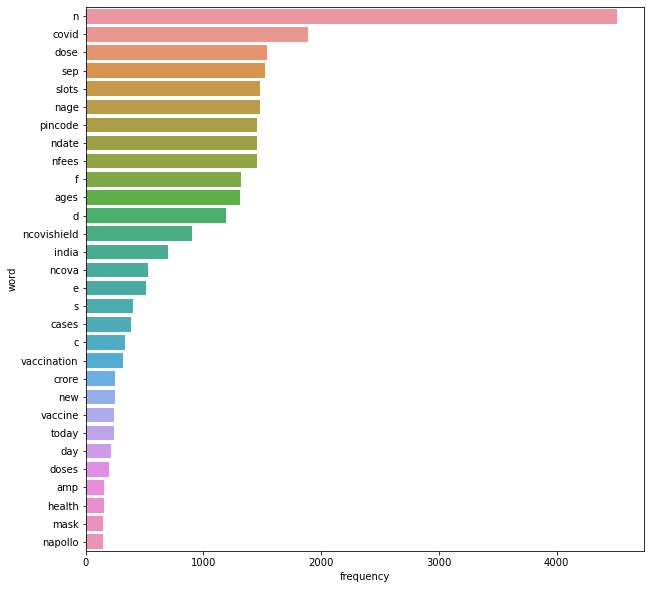

In [33]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [34]:
tweet.to_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\INDIAMASKtweetfinalsentiment.csv',index=False)

In [35]:
sentiment_df.head()

,text,polarity,sentiment
0,loot nget pharmeasy plus months membership re ...,0.0,neutral
1,jpr face mask still mandatory private car full...,0.0,neutral
2,don t let guard covid third wave e ected make ...,0.0,neutral
3,using mask getting vaccinated unlock chances g...,0.45,positive
4,average people see inside hospital public plac...,-0.075,negative


In [36]:
sentiment_df.describe()

,text,polarity,sentiment
count,4399,4399.0,4399
unique,2813,279.0,3
top,pincode ncovishield dose slots n nage ages nda...,0.0,neutral
freq,24,2886.0,2886


In [37]:
sentiment_df.groupby('sentiment').size()

sentiment
negative     354
neutral     2886
positive    1159
dtype: int64

In [38]:
print(sentiment_df.groupby('polarity').size())

polarity
-1.000000     4
-0.800000     4
-0.800000     2
-0.700000     2
-0.700000     1
             ..
 0.800000    35
 0.850000     3
 0.900000     6
 0.933333     1
 1.000000    16
Length: 279, dtype: int64


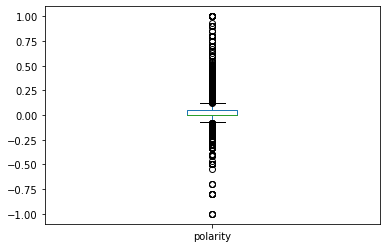

In [39]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()


In [40]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,sentiment,polarity,text
0,neutral,0.0,loot nget pharmeasy plus months membership re ...
1,neutral,0.0,jpr face mask still mandatory private car full...
2,neutral,0.0,don t let guard covid third wave e ected make ...
3,positive,0.45,using mask getting vaccinated unlock chances g...
4,negative,-0.075,average people see inside hospital public plac...
5,neutral,0.0,precautions covid suggested government india i...
6,neutral,0.0,satiesh covid suggested government india inter...
7,positive,0.285714,jharkhand covid guidelines right now atleast d...
8,neutral,0.0,dear nflights mein mask face shield amp ppe go...
9,neutral,0.0,covid suggested government india interest cust...


In [41]:
dataset2.describe()#dataset2.hist()
#plt.show()

,sentiment,polarity,text
count,4399,4399.0,4399
unique,3,279.0,2813
top,neutral,0.0,pincode ncovishield dose slots n nage ages nda...
freq,2886,2886.0,24


In [43]:
dataset2[:10]

,sentiment,polarity,text
0,neutral,0.0,loot nget pharmeasy plus months membership re ...
1,neutral,0.0,jpr face mask still mandatory private car full...
2,neutral,0.0,don t let guard covid third wave e ected make ...
3,positive,0.45,using mask getting vaccinated unlock chances g...
4,negative,-0.075,average people see inside hospital public plac...
5,neutral,0.0,precautions covid suggested government india i...
6,neutral,0.0,satiesh covid suggested government india inter...
7,positive,0.285714,jharkhand covid guidelines right now atleast d...
8,neutral,0.0,dear nflights mein mask face shield amp ppe go...
9,neutral,0.0,covid suggested government india interest cust...


In [45]:
dataset.hist()
plt.show()

NameError: name 'dataset' is not defined

In [46]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [47]:
df1.head()

,text
0,pincode ncova n dose slots n nage ages ndate s...
1,largestvaccinedrive nwomen braces incessant ra...
2,love thy neighbour thyself keep safe d s t n c...
3,long time comprehensive thread covidvaccine si...
4,pincode ncovishield dose slots n nage ndate se...


In [48]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [49]:
df_train.head()

,text,sentiment
0,pincode ncova n dose slots n nage ages ndate s...,neutral
1,largestvaccinedrive nwomen braces incessant ra...,positive
2,love thy neighbour thyself keep safe d s t n c...,positive
3,long time comprehensive thread covidvaccine si...,negative
4,pincode ncovishield dose slots n nage ndate se...,neutral


In [50]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [51]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [52]:
df_test.head()

,text,sentiment
0,million took minutes pm cowin covid n,neutral
1,authorities controlling slots major asian airp...,positive
2,discussions around afghanistan businesses rise...,positive
3,pincode ncovishield dose slots n nage ages nda...,negative
4,pincode ncova n dose slots n nage ages ndate s...,neutral


In [55]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [57]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [58]:
df_train.head()
#punctuations are removed from news column in train dataset

,text,sentiment
0,pincode ncova n dose slots n nage ages ndate s...,neutral
1,largestvaccinedrive nwomen braces incessant ra...,positive
2,love thy neighbour thyself keep safe d s t n c...,positive
3,long time comprehensive thread covidvaccine si...,negative
4,pincode ncovishield dose slots n nage ndate se...,neutral


In [59]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [61]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [62]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['largestvaccinedrive', 'nwomen', 'braces', 'incessant', 'rains', 'que', 'large', 'numbers', 'covid', 'vaccination', 'camp']
Sentence after removing stopwords: ['love', 'thy', 'neighbour', 'thyself', 'keep', 'safe', 'n', 'c', 'e', 'n', 'guwahati', 'assam']
Sentence after removing stopwords: ['able', 'leadership', 'pm', 'ji', 'covid', 'vaccination', 'drive', 'going', 'steady', 'pace', 'c']
Sentence after removing stopwords: ['want', 'future', 'normal', 'nmake', 'pledge', 'always', 'wear', 'leeford', 'n', 'mask', 'outside', 'follow', 'smarter']
Sentence after removing stopwords: ['new', 'record', 'f', 'nno', 'government', 'leadership', 'world', 'even', 'think', 'nthe', 'numbers', 'speak', 'th']
Sentence after removing stopwords: ['great', 'welcome', 'third', 'wave', 'coronavirus', 'nban', 'diwali', 'ban', 'temples', 'nbut', 'conduct']
Sentence after removing stopwords: ['imho', 'ask', 'wet', 'lease', 'local', 'trains', 'run', 'best', 'bu']
Sentence afte

Sentence after removing stopwords: ['new', 'covid', 'cases', 'tick', 'vaccination', 'rate', 'surges', 'n', 'nlive', 'blog']
Sentence after removing stopwords: ['italy', 'motor', 'gasoline', 'transport', 'diesel', 'diesel', 'gasoil', 'sales', 'rose', 'pre', 'pandemic', 'levels', 'august', 'accor']
Sentence after removing stopwords: ['india', 'abl', 'help', 'many', 'nations', 'vaccines', 'remedsivir', 'drugs', 'related', 'covid', 'many', 'countries']
Sentence after removing stopwords: ['founder', 'amp', 'ceo', 'says', 'witnessed', 'times', 'jump', 'online', 'traffic', 'first']
Sentence after removing stopwords: ['watching', 'increasing', 'vaccination', 'today', 'counter', 'cowin', 'dashboard', 'really', 'giving', 'joy', 'ev']
Sentence after removing stopwords: ['india', 'far', 'administered', 'vaccine', 'doses', 'per', 'cent', 'total', 'caseload']
Sentence after removing stopwords: ['mask', 'integrated', 'fresh', 'air', 'fan', 'sounds', 'interesting', 'premium', 'technology', 'maskup']
S

Sentence after removing stopwords: ['crore', 'doses', 'day', 'great', 'achivement', 'milestone', 'world', 'record', 'congrats', 'team', 'india', 'covid', 'vaccination']
Sentence after removing stopwords: ['today', 'done', 'first', 'dose', 'vaccine', 'happy', 'first', 'dose', 'cova', 'n', 'covid', 'firstdose', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'th']
Sentence after removing stopwords: ['state', 'wise', 'status', 'second', 'dose', 'vaccination', 'n', 'n', 'diu', 'covid', 'vaccination']
Sentence after removing stopwords: ['assam', 'assam', 'logs', 'new', 'covid', 'cases', 'deaths', 'n', 'covid', 'assamcovidupdate', 'n', 'n', 'assam', 'mahanta']
Sentence after removing stopwords: ['puducherry', 'witnesses', 'new', 'covid', 'cases', 'recoveries', 'fatality', 'last', 'hours', 'n', 'n', 'f', 'hospitalise']
Sentence after removing stopwords: ['india', 'touring', 'new', 'zealand', 'later', 'year', 'due', 'packed', 'calendar', 'amp', 'covid', 'related', 'restrictions']
Sentence after removi

Sentence after removing stopwords: ['f', 'informed', 'today', 'vaccination', 'camps', 'general', 'public', 'kovai', 'n', 'wearamask']
Sentence after removing stopwords: ['us', 'authorities', 'said', 'current', 'travel', 'restrictions', 'remain', 'place', 'administration', 'rolls', 'new']
Sentence after removing stopwords: ['true', 'forms', 'communications', 'mass', 'persuasion', 'used', 'people', 'maskup', 'vaccinated']
Sentence after removing stopwords: ['know', 'monthly', 'large', 'amp', 'mid', 'cap', 'fund', 'sip', 'last', 'years', 'irr']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages']
Sentence after removing stopwords: ['covid', 'india', 'sets', 'new', 'world', 'record', 'crore', 'vaccine', 'doses', 'day', 'vaccinationdrive']
Sentence after removing stopwords: ['good', 'amount', 'vitamin', 'body', 'covid', 'infection', 'prevent', 'severe', 'disease', 'death', 'n', 'n', 'n', 'n', 'vitamind']
Sentence after removing sto

Sentence after removing stopwords: ['done', 'covid', 'going', 'done', 'covid', 'anytime', 'near', 'future', 'gagand']
Sentence after removing stopwords: ['th', 'sep', 'summary', 'bengaluru', 'covid', 'per', 'n', 'ntests', 'c', 'f', 'f', 'f', 'ndaily', 'positive', 'c', 'f', 'f', 'f', 'ndeaths', 'c', 'f', 'f', 'f', 'np']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncovishield', 'dose', 'slots', 'n', 'nage']
Sentence after removing stopwords: ['dear', 'citizens', 'staying', 'safe', 'taking', 'necessary', 'precautions', 'help', 'slow', 'spread', 'vi']
Sentence after removing stopwords: ['year', 'possible', 'blessings', 'lalbaugcharaja', 'mumbai', 'sure', 'bappa', 'listen']
Sentence after removing stopwords: ['cr', 'covid', 'vaccine', 'doses', 'administered', 'new', 'single', 'day', 'doses', 'administered', 'record', 'created', 'birthday', 'hon']
Sentence after removing stopwords: ['crore', 'balance', 'unutilized', 'covid', 'vaccine', 'doses', 'still', 'available', 'state'

Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'last', 'hours', 'daily', 'positivity', 'rate', 'n', 'n']
Sentence after removing stopwords: ['coronavirusupdate', 'coronaviruspandemic', 'new', 'coronavirus', 'cases', 'reduction', 'active', 'cases', 'recoveries']
Sentence after removing stopwords: ['e', 'ert', 'noted', 'people', 'find', 'period', 'returns', 'normal', 'following', 'cycle', 'important']
Sentence after removing stopwords: ['campuses', 'back', 'action', 'students', 'back', 'school', 'n', 'n', 'maskon', 'backtoschool', 'schoolsofbangalore']
Sentence after removing stopwords: ['smile', 'india', 'trust', 'activity', 'distributing', 'bed', 'sheet', 'needy', 'people', 'thank', 'every', 'one', 'volunteers', 'f']
Sentence after removing stopwords: ['new', 'covid', 'cases', 'deaths', 'reported', 'last', 'hours', 'india', 'kerala', 'recorded', 'covid', 'ca']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncovishield', 'dose', 'slots', 

Sentence after removing stopwords: ['find', 'perfect', 'face', 'mask', 'n', 'facemask', 'mask', 'skin', 'skincare', 'healthyskin']
Sentence after removing stopwords: ['update', 'newly', 'detected', 'covid', 'cases', 'last', 'n', 'hrs', 'bmc', 'area', 'n', 'th', 'september', 'till']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'last', 'hours']
Sentence after removing stopwords: ['world', 'largest', 'vaccination', 'drive', 'full', 'swing', 'n', 'nindia', 'administers', 'cr', 'million']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages']
Sentence after removing stopwords: ['biharfightscorona', 'nupdate', 'day', 'n', 'e', 'f', 'f', 'covid', 'cases', 'reported', 'far', 'th', 'september']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'per', 'health', 'ministry']
Sentence after removing stopwords: ['covid', 'undone', 'much

Sentence after removing stopwords: ['following', 'covid', 'appropriate', 'behavior', 'classes', 'resume', 'kerala', 'colleges', 'oct', 'n', 'n', 'briflynews']
Sentence after removing stopwords: ['combined', 'impact', 'climatecrisis', 'amp', 'covid', 'stolen', 'gains', 'economic', 'growth', 'achieved', 'several', 'nation']
Sentence after removing stopwords: ['limit', 'count', 'abilities', 'ntake', 'business', 'online', 'bmdu', 'feel', 'proud']
Sentence after removing stopwords: ['huge', 'crowds', 'seen', 'roads', 'byculla', 'tardeo', 'lalbaug', 'parel', 'area', 'known', 'grand', 'celebrations', 'idols', 'th']
Sentence after removing stopwords: ['india', 'overtakes', 'economically', 'developmentally', 'forward', 'nations', 'world', 'daily', 'avera']
Sentence after removing stopwords: ['newly', 'created', 'state', 'n', 'magahi', 'maithili', 'bhojpuri', 'bangla', 'locallanguages']
Sentence after removing stopwords: ['covid', 'un', 'secretary', 'general', 'says', 'bar', 'unvaccinated', 'hea

Sentence after removing stopwords: ['f', 'live', 'f', 'n', 'nprime', 'minister', 'interacts', 'healthcare', 'workers', 'beneficiaries', 'covid', 'vaccinatio']
Sentence after removing stopwords: ['surya', 'fine', 'nomask', 'functions', 'fo']
Sentence after removing stopwords: ['covid', 'need', 'early', 'preventive', 'curative', 'treatments', 'covid', 'vaccinemadness', 'countering', 'logical']
Sentence after removing stopwords: ['tn', 'sep', 'corona', 'update', 'n', 'n', 'new', 'cases', 'covid', 'tamil', 'nadu', 'tested', 'today', 'n', 'n', 'cases', 'chen']
Sentence after removing stopwords: ['union', 'health', 'secretary', 'rajesh', 'bhushan', 'said', 'percent', 'india', 'adult', 'population', 'received', 'doses']
Sentence after removing stopwords: ['boys', 'going', 'blue', 'salute', 'frontline', 'warriors', 'supporting', 'f', 'n', 'ncheer']
Sentence after removing stopwords: ['f', 'kerala', 'reports', 'fresh', 'covid', 'infections', 'recoveries', 'deaths', 'today', 'n', 'nactive', 'cas

In [63]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['long', 'time', 'comprehensive', 'thread', 'covidvaccine', 'situation', 'make']
Sentence after removing stopwords: ['meanwhile', 'usa', 'deep', 'red', 'worst', 'situation', 'n', 'n', 'covid']
Sentence after removing stopwords: ['sonu', 'sood', 'help', 'covid', 'ppl', 'probe', 'hc', 'order', 'giving', 'vaccines', 'illegally', 'nkerjiwal', 'said', 'govt', 'inti']
Sentence after removing stopwords: ['urged', 'fda', 'accepted', 'wah', 'wah', 'mercantile', 'propaganda', 'n', 'nsay', 'vaccinated', 'unethica']
Sentence after removing stopwords: ['push', 'greener', 'electricvehicles', 'forget', 'contribution', 'conventional', 'vehicles', 'ind']
Sentence after removing stopwords: ['covid', 'changed', 'game', 'travel', 'tourism', 'sector', 'n', 'travel']
Sentence after removing stopwords: ['fake', 'vaccination', 'certificate', 'available', 'telegram', 'rs', 'check', 'point', 'covid', 'coronavirus']
Sentence after removing stopwords: ['first', 'see', 'going', '

Sentence after removing stopwords: ['n', 'nwhy', 'reduction', 'rtpcr', 'tests', 'done', 'past', 'days']
Sentence after removing stopwords: ['kerala', 'records', 'new', 'covid', 'cases', 'samples', 'sent', 'testing', 'past', 'hours', 'test', 'po']
Sentence after removing stopwords: ['entitled', 'long', 'wore', 'mask', 'nthe', 'younger', 'woman', 'election', 'manager', 'alisa', 'keane']
Sentence after removing stopwords: ['fate', 'children', 'seen', 'secondary', 'needs', 'adults', 'material', 'non', 'material', 'needs']
Sentence after removing stopwords: ['beatingtheretreatceremony', 'attariborder', 'resumed', 'th', 'sep', 'suspended', 'th', 'mar', 'due']
Sentence after removing stopwords: ['sadly', 'coronavirus', 'case', 'numbers', 'carroll', 'county', 'rise', 'want', 'amp', 'staff', 'protected']
Sentence after removing stopwords: ['ready', 'tame', 'badass', 'tresses', 'moisturization', 'amp', 'nourishment', 'n', 'n', 'haircare', 'hairgrowth', 'hairmask']
Sentence after removing stopwor

Sentence after removing stopwords: ['icymi', 'f', 'f', 'covid', 'pandemic', 'might', 'virus', 'stay', 'long', 'official', 'f', 'f', 'n', 'nfull', 'story']
Sentence after removing stopwords: ['covid', 'even', 'g', 'many', 'serious', 'health', 'issues', 'g', 'pushed', 'clandestinely', 'citing', 'sham', 'covid', 'virus']
Sentence after removing stopwords: ['sept', 'covid', 'snapshot', 'n', 'f', 'new', 'cases', 'deaths', 'amp', 'l', 'tests', 'day', 'n', 'f', 'day', 'average', 'tpr', 'n', 'f', 'l', 'activ']
Sentence after removing stopwords: ['design', 'business', 'model', 'future', 'n', 'nthe', 'covid', 'pandemic', 'forced', 'businesses', 'take', 'look', 'busines']
Sentence after removing stopwords: ['indian', 'women', 'use', 'sanitary', 'pads', 'says', 'nfhs', 'data', 'pandemic', 'made', 'worse', 'n', 'nmenstrual', 'health']
Sentence after removing stopwords: ['covid', 'india', 'update', 'single', 'day', 'testing', 'lakh', 'vaccinations', 'lakh', 'n', 'n', 'f', 'fthe', 'day', 'average', '

In [69]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'bella']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'manyata', 'clinic', 'ye']
Sentence after removing stopwords: ['concessional', 'gst', 'rates', 'covid', 'related', 'drugs', 'e', 'ended', 'till', 'december', 'says', 'nirmala', 'sitharaman', 'n', 'n', 'gst', 'covid']
Sentence after removing stopwords: ['till', 'friday', 'afternoon', 'india', 'vaccinated', 'crore', 'people', 'covid', 'fourth', 'time', 'country', 'p']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrainbowhos']
Sentence after removing stopwords: ['cr', 'still', 'counting', 'ngreat', 'work', 'medical', 'frontline', 'warrior', 'f', 'f', 'n', 'n', 'covid', 'covishield', 'cova', 'n']
Sentence after removing stopwords: ['india', 'adm

Sentence after removing stopwords: ['india', 'uk', 'working', 'together', 'tackle', 'global', 'challenges', 'covid', 'regional', 'security', 'prosperity']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cl']
Sentence after removing stopwords: ['ppl', 'power', 'authority', 'want', 'wear', 'mask', 'try', 'justify', 'giving', 'illogical', 'reasons']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospi']
Sentence after removing stopwords: ['speaker', 'removed', 'mask', 'video', 'recording', 'ensure', 'voice', 'clarity', 'passenger', 'safety', 'especiall']
Sentence after removing stopwords: ['breakingnews', 'n', 'nanother', 'milestone', 'added', 'india', 'fight', 'covid']
Sentence after removing stopwords: ['foolish', 'fda', 'n', 'nounethicalvaccine', 'n', 'covid']
Sentence after removing stopwords: ['pincode', 'ncova'

Sentence after removing stopwords: ['india', 'crosses', 'landmark', 'cr', 'covid', 'vaccination', 'pm', 'set', 'cross', 'record', 'cr', 'vaccinations', 'mark']
Sentence after removing stopwords: ['uk', 'seeing', 'shortage', 'food', 'amp', 'might', 'become', 'permanent', 'know', 'amp', 'caused', 'problem']
Sentence after removing stopwords: ['second', 'wave', 'covid', 'spread', 'across', 'nation', 'volunteers', 'came', 'aid', 'familie']
Sentence after removing stopwords: ['sharing', 'thoughts', 'amp', 'wrote', 'research', 'study', 'actions', 'aspiring']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nadd', 'scan']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence af

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'kadu']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'cmi', 'hospital', 'c', 'ye']
Sentence after removing stopwords: ['administration', 'vaccine', 'doses', 'last', 'hours', 'country', 'covid', 'vaccination', 'coverage', 'su']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'bella']
Sentence after removing stopwords: ['kerala', 'today', 'n', 'n', 'cases', 'n', 'samples', 'tested', 'n', 'n', 'kerala', 'covid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nst', 'marth']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'npathway']
Sente

Sentence after removing stopwords: ['e', 'c', 'f', 'e', 'e', 'f', 'e', 'c', 'n', 'n', 'icmr', 'prioritised', 'govt', 'political', 'goals', 'science', 'evidence', 'n', 'n', 'icmr', 'cta']
Sentence after removing stopwords: ['occasion', 'hon', 'ble', 'pm', 'sh', 'ji', 'birthday', 'tripura', 'state', 'doctors', 'cell', 'along']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmedihope', 'ho']
Sentence after removing stopwords: ['corporate', 'medical', 'claims', 'e', 'ired', 'last', 'working', 'day', 'employeewellbeing', 'covid', 'healthinsurance']
Sentence after removing stopwords: ['india', 'prime', 'minister', 'n', 'n', 'globally', 'leads', 'way', 'inoculating', 'citizens', 'covid', 'pan']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherhoo']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'na

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncare']
Sentence after removing stopwords: ['always', 'announce', 'wearing', 'mask', 'time', 'run', 'c', 'al', 'time', 'travellin']
Sentence after removing stopwords: ['stark', 'difference', 'india', 'us', 'one', 'ready', 'pay', 'vaccinated', 'struggling']
Sentence after removing stopwords: ['rock', 'skincare', 'daily', 'weekly', 'monthly', 'amp', 'yearly', 'n', 'n', 'skincare', 'skincareroutine', 'skincarelovers']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrakshobhy']
Sentence after removing stopwords: ['shri', 'ji', 'cheerleader', 'bjp', 'data', 'driven', 'facts', 'speak', 'truth', 'health', 'care', 'system', 'run', 'em']
Sentence after removing stopwords: ['crore', 'plus', 'dose', 'today', 'salute', 'healthcare', 'staff', 'working', 'tirelessly', 'another', 'history', 'created

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndev', 'healt']
Sentence after removing stopwords: ['f', 'india', 'cumulative', 'covid', 'vaccination', 'coverage', 'e', 'eeds', 'cr', 'n', 'n', 'f', 'lakh', 'doses', 'administered', 'las']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'natreum', 'ho']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmedihope', 'ho']
Sentence after removing stopwords: ['royal', 'challengers', 'bangalore', 'skipper', 'virat', 'kohli', 'unveiled', 'blue', 'jerseys', 'resembling', 'colour', 'ppe', 'kits', 'frontline', 'wa']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dos

Sentence after removing stopwords: ['disability', 'acts', 'india', 'part', 'f', 'f', 'c', 'f', 'f', 'occupationaltherapy', 'physiotherapy']
Sentence after removing stopwords: ['telangana', 'vaccinated', 'lakh', 'people', 'today', 'covid', 'nmajor', 'boost', 'second', 'dose', 'administration']
Sentence after removing stopwords: ['us', 'fda', 'pfizer', 'booster', 'shots', 'approved', 'people', 'n', 'n', 'covid', 'boostershot', 'usfda']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'sunny']
Sentence after removing stopwords: ['reminder', 'us', 'uk', 'israel', 'wait', 'pm', 'birthday', 'vaccinate', 'citizens', 'save', 'lives']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'ncolumbia', 'asia', 'hosp', 'hebbal']
Sentence after removing stopwords: ['india', 'sets', 'record', 'crore', 'vaccinations', 'day', 'n', 'n', 'covid', 'n']
Sentence a

Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['administration', 'vaccine', 'doses', 'last', 'hours', 'country', 'covid', 'vaccination', 'coverage', 'su']
Sentence after removing stopwords: ['gstcouncil', 'chaired', 'union', 'finance', 'minister', 'meet', 'friday', 'discuss', 'several', 'key', 'issues']
Sentence after removing stopwords: ['people', 'courageous', 'enter', 'outbreak', 'stricken', 'areas', 'quarantine', 'centers', 'hospitals', 'serve', 'pan']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napoorva', 'h']
Sentence after removing stopwords: ['ludhiana', 'e', 'els', 'covid', 'tests', 'punja', 'confirms', 'n', 'nconducts', 'tests', 'last', 'days']
Sentence after removing stopwords: ['westbengal', 'kolkata', 'states', 'india', 'fever', 'child', 'se']
Sentence after rem

Sentence after removing stopwords: ['learn', 'solarsytem', 'publish', 'application', 'ios', 'android', 'augmentedreality', 'feature', 'n', 'ncheckout']
Sentence after removing stopwords: ['breaking', 'mauritius', 'ex', 'pm', 'navinchandra', 'ramgoolam', 'shifted', 'private', 'ward', 'aiims', 'turning']
Sentence after removing stopwords: ['total', 'number', 'covidvaccine', 'doses', 'administered', 'india', 'crossed', 'crore', 'covid', 'coronavirus']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'hel']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nfortis', 'ho']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'whi']
Sentence after removing stopwords: ['india', 'covid', 'dailyupdate', 'n', 'n', 'posrate', 'f', 'c', 'n', 'newcases', 'f

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nez', 'aarthi']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naarthi', 'scan']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkanva', 'dia']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospi']
Sentence after removing stopwords: ['world', 'largestvaccinedrive', 'breaking', 'records', 'strengthening', 'india', 'fight', 'covid', 'indiafightscorona']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsagar', 'ho']
Sentence after removing stopwords: ['mr', 'mann', 'prashad', 'family', 'going', 'toughest', 'time', 'lives', 'covid', 'took', 'everythin

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nd', 'pol']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherho']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nunity', 'li']
Sentence after removing stopwords: ['stem', 'cell', 'based', 'therapy', 'treat', 'covid', 'received', 'approval', 'cfor', 'clinical', 'trial', 'biological', 'division']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nunity', 'li']
Sentence after removing stopwords: ['clover', 'finance', 'clv', 'n', 'lithium', 'finance', 'lith', 'n', 'beyond', 'finance', 'byn', 'n', 'n', 'casper', 'network', 'n', 'paid', 'network', 'n', 'aioz', 'network']
Sentence after removing stopwords: ['pincode', 'ncovishield', 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ntotal']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmilann', 'hosp']
Sentence after removing stopwords: ['asked', 'workers', 'across', 'country', 'facilitate', 'covid', 'vaccination', 'drive', 'occasion']
Sentence after removing stopwords: ['covid', 'deaths', 'n', 'covid']
Sentence after removing stopwords: ['aai', 'coimbatore', 'international', 'airport', 'n', 'n', 'n', 'update', 'arrival', 'departure', 'flight', 'schedule']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nst', 'martha']
Sentence after removing stopwords: ['covid', 'f', 'e', 'f', 'update', 'n', 'ntotal', 'n', 'ncases', 'nactive', 'nrecoveries', 'n', 'f', 'ntest']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slo

Sentence after removing stopwords: ['power', 'shutdown', 'areas', 'chennai', 'sept', 'chennai', 'powershutdown', 'powercut', 'atzone', 'covid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cm']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'whi']
Sentence after removing stopwords: ['x', 'covid', 'care', 'home', 'packages', 'n', 'naffordable', 'packages', 'tailored', 'help', 'recover', 'safety', 'comfort']
Sentence after removing stopwords: ['india', 'administered', 'crore', 'daily', 'covid', 'vaccinations', 'till', 'pm', 'today']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naster', 'rv']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsparsh', 'hos']

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nadd', 'sc']
Sentence after removing stopwords: ['cnbctv', 'e', 'lusive', 'gst', 'council', 'e', 'ends', 'concessions', 'specified', 'drugs', 'used', 'covid', 'treatment', 'till', 'dec', 'n', 'n', 'f', 'fno', 'g']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'malathi']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsakra', 'premium', 'clinic', 'p', 'w']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['ninety', 'three', 'lakh', 'amp', 'counting', 'n', 'nas', 'india', 'celebrates', 'birthday', 'pm', 'world']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slot

Sentence after removing stopwords: ['going', 'back', 'article', 'written', 'may', 'seeing', 'india', 'stands', 'today', 'vacci']
Sentence after removing stopwords: ['kids', 'teased', 'bullied', 'shamed', 'body', 'look', 'make', 'kids', 'feel', 'deeply', 'hurt', 'harm']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'cmi', 'hospital', 'c', 'ye']
Sentence after removing stopwords: ['india', 'covid', 'updates', 'n', 'ncases', 'ndeaths', 'nrecovered', 'n', 'ntotal', 'cases', 'ntotal', 'deaths', 'ntota']
Sentence after removing stopwords: ['today', 'sarvodaya', 'bal', 'vidyalaya', 'ashok', 'nagar', 'delhi', 'electricity', 'problem', 'yes']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west', 'b']
Sentence after removing stopwords: ['statment', 'ceo', 'n', 'india', 'saved', 'world', 'covid', 'pandemic', 'statement', 'indi

Sentence after removing stopwords: ['join', 'us', 'inaugural', 'session', 'international', 'symposium', 'reimagining', 'inclusive', 'cities', 'covid', 'er']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nez', 'aarthi']
Sentence after removing stopwords: ['indonesian', 'government', 'reopen', 'resort', 'island', 'bali', 'international', 'visitors', 'october', 'amid', 'constan']
Sentence after removing stopwords: ['nirmala', 'sitharaman', 'announced', 'gst', 'e', 'ension', 'covid', 'related', 'drugs', 'till', 'december', 'increased', 'rate', 'loc']
Sentence after removing stopwords: ['still', 'reservation', 'using', 'public', 'transport', 'covid', 'era', 'appreciati']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'h']
Sentence after removing stopwords: ['hillsborough', 'gop', 'member', 'death', 'covid', 'causes', 'financi

Sentence after removing stopwords: ['photos', 'citizens', 'receive', 'covid', 'vaccination', 'across', 'india', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ngreenview']
Sentence after removing stopwords: ['nipah', 'death', 'kerala', 'virus', 'amid', 'raging', 'covid', 'pandemic', 'nground', 'zero', 'report', 'state', 'scramble']
Sentence after removing stopwords: ['patradevi', 'la', 'ty', 'dabolimairport', 'e', 'oses', 'covidmismanagement', 'goagovt', 'govt']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrainbowh']
Sentence after removing stopwords: ['term', 'csocial', 'distancing', 'dhas', 'disappeared', 'n', 'n', 'covid']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospita']
Sentence after removing stopwords: ['pincode', 'ncovishiel

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrakshobhya']
Sentence after removing stopwords: ['link', 'pm', 'today', 'join', 'dilip', 'chenoy', 'naina', 'lal', 'kidwa']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndev', 'healt']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nhealing', 'h']
Sentence after removing stopwords: ['f', 'covid', 'india', 'administered', 'crore', 'daily', 'vaccinations', 'till', 'pm', 'today', 'n', 'n', 'data', 'source', 'cowin']
Sentence after removing stopwords: ['maharashtra', 'covid', 'data', 'sept', 'n', 'ncases', 'nnew', 'ntotal', 'ndeaths', 'nnew', 'ntotal', 'n', 'ntests', 'n']
Sentence after removing stopwords: ['final', 'numbers', 'covid', 'vaccination', 'n', 'vaccinationdrive', 'n', 'cowin', 'nthankyou', 'hea']


Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkims', 'hos']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nhealing']
Sentence after removing stopwords: ['hotel', 'staff', 'humans', 'government', 'said', 'people', 'vaccinated', 'open']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nvivekanan']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nprima', 'dia']
Sentence after removing stopwords: ['covid', 'maharashtra', 'govt', 'impose', 'e', 'ra', 'curbs', 'ganpatifestival', 'rajeshtope', 'says', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nadd', 'sc']
Sentence after removing stopwords: ['pin

Sentence after removing stopwords: ['uttarakhandhighcourt', 'thursday', 'vacated', 'stay', 'chardhamyatra', 'directed', 'state', 'government', 'c']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naltius', 'ho']
Sentence after removing stopwords: ['growth', 'opportunities', 'latent', 'adjacency', 'automotive', 'ambient', 'lighting', 'market', 'n', 'nview', 'detail', 'toc']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'rajesh']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncloudnine']
Sentence after removing stopwords: ['ganeshutsav', 'th', 'day', 'nourishing', 'aspiration', 'n', 'nafter', 'covid', 'theme', 'used', 'lemon', 'soap', 'herbs', 'used', 'celebrat']
Sentence after removing stopwords: ['use', 'ivermectin', 'treat', 'prevent', 'covid']


Sentence after removing stopwords: ['doctor', 'shamma', 'number', 'cases', 'go', 'uo', 'u', 'test', 'shows', 'covid', 'rampant', 'kerala']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospi']
Sentence after removing stopwords: ['covid', 'cowin', 'nplease', 'suggest', 'know']
Sentence after removing stopwords: ['covid', 'victims', 'hospitals', 'vaccinated', 'ones', 'delta', 'cases', 'vaccination', 'cases', 'doctors', 'hos']
Sentence after removing stopwords: ['pune', 'district', 'vaccination', 'status', 'nfirst', 'shot', 'nfully', 'vaccinated', 'n', 'nlot', 'citizens', 'eligible', 'nd', 'shot']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napoorva', 'hos']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nshankar', 'specialty', 'hospi']
Sentence after re

In [70]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [133]:
df_positive.to_csv("maskunigrampositive.csv",mode='a',index=False,header=False)
df_negative.to_csv("maskunigramnegative.csv",mode='a',index=False,header=False)
df_neutral.to_csv("maskunigramneutral.csv",mode='a',index=False,header=False)

In [134]:
df_positive.shape

(2253, 2)

In [135]:
df_negative.shape

(992, 2)

In [136]:
df_neutral.shape

(2902, 2)

In [130]:
df_positive.to_csv("unigrammask.csv",mode='a',index=False,header=False)
df_negative.to_csv("unigrammask.csv",mode='a',index=False,header=False)
df_neutral.to_csv("unigrammask.csv",mode='a',index=False,header=False)

In [137]:
df3=pd.read_csv('unigrammask.csv',header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

,unigram,repetation
0,n,464
1,covid,348
2,f,224
3,india,135
4,cases,118


In [156]:
df3.to_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\final mask dataset\unigrammask.csv',index=False)

In [115]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [138]:
df3.shape

(6147, 2)

In [116]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [73]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

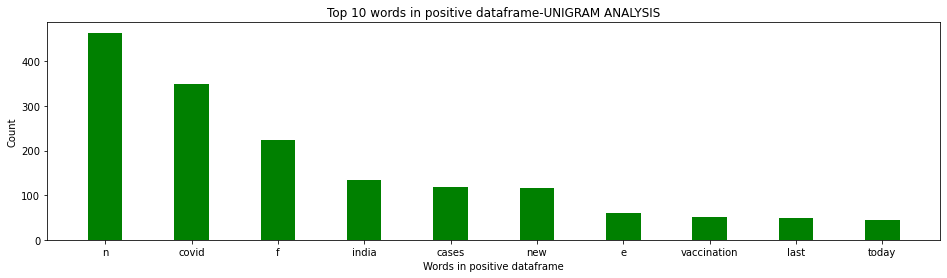

In [74]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

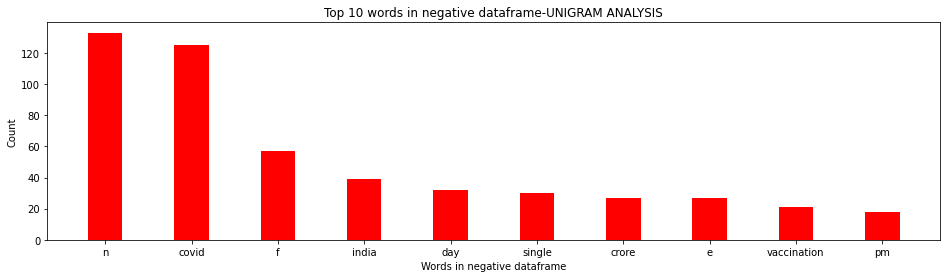

In [75]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

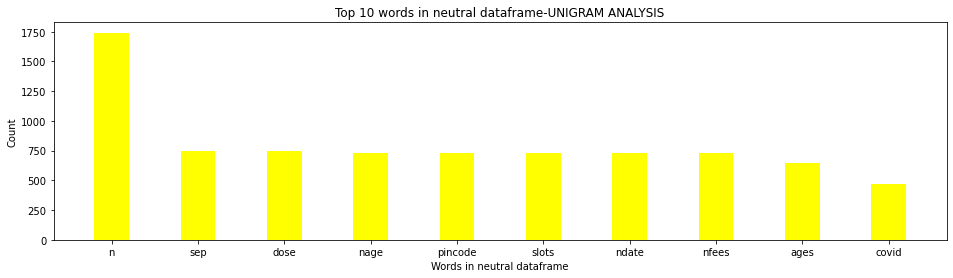

In [76]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [77]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes



In [78]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['largestvaccinedrive', 'nwomen', 'braces', 'incessant', 'rains', 'que', 'large', 'numbers', 'covid', 'vaccination', 'camp']
Sentence after removing stopwords: ['love', 'thy', 'neighbour', 'thyself', 'keep', 'safe', 'n', 'c', 'e', 'n', 'guwahati', 'assam']
Sentence after removing stopwords: ['able', 'leadership', 'pm', 'ji', 'covid', 'vaccination', 'drive', 'going', 'steady', 'pace', 'c']
Sentence after removing stopwords: ['want', 'future', 'normal', 'nmake', 'pledge', 'always', 'wear', 'leeford', 'n', 'mask', 'outside', 'follow', 'smarter']
Sentence after removing stopwords: ['new', 'record', 'f', 'nno', 'government', 'leadership', 'world', 'even', 'think', 'nthe', 'numbers', 'speak', 'th']
Sentence after removing stopwords: ['great', 'welcome', 'third', 'wave', 'coronavirus', 'nban', 'diwali', 'ban', 'temples', 'nbut', 'conduct']
Sentence after removing stopwords: ['imho', 'ask', 'wet', 'lease', 'local', 'trains', 'run', 'best', 'bu']
Sentence afte

Sentence after removing stopwords: ['new', 'covid', 'cases', 'tick', 'vaccination', 'rate', 'surges', 'n', 'nlive', 'blog']
Sentence after removing stopwords: ['italy', 'motor', 'gasoline', 'transport', 'diesel', 'diesel', 'gasoil', 'sales', 'rose', 'pre', 'pandemic', 'levels', 'august', 'accor']
Sentence after removing stopwords: ['india', 'abl', 'help', 'many', 'nations', 'vaccines', 'remedsivir', 'drugs', 'related', 'covid', 'many', 'countries']
Sentence after removing stopwords: ['founder', 'amp', 'ceo', 'says', 'witnessed', 'times', 'jump', 'online', 'traffic', 'first']
Sentence after removing stopwords: ['watching', 'increasing', 'vaccination', 'today', 'counter', 'cowin', 'dashboard', 'really', 'giving', 'joy', 'ev']
Sentence after removing stopwords: ['india', 'far', 'administered', 'vaccine', 'doses', 'per', 'cent', 'total', 'caseload']
Sentence after removing stopwords: ['mask', 'integrated', 'fresh', 'air', 'fan', 'sounds', 'interesting', 'premium', 'technology', 'maskup']
S

Sentence after removing stopwords: ['pakistan', 'safe', 'foreign', 'investors', 'visitors', 'players', 'nplease', 'avoid', 'visiting', 'pakistan', 'n', 'pakistanisnotsafe']
Sentence after removing stopwords: ['last', 'hours', 'india', 'reported', 'fresh', 'covid', 'cases', 'fatalities', 'according', 'latest', 'updat']
Sentence after removing stopwords: ['crore', 'doses', 'day', 'great', 'achivement', 'milestone', 'world', 'record', 'congrats', 'team', 'india', 'covid', 'vaccination']
Sentence after removing stopwords: ['today', 'done', 'first', 'dose', 'vaccine', 'happy', 'first', 'dose', 'cova', 'n', 'covid', 'firstdose', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'th']
Sentence after removing stopwords: ['state', 'wise', 'status', 'second', 'dose', 'vaccination', 'n', 'n', 'diu', 'covid', 'vaccination']
Sentence after removing stopwords: ['assam', 'assam', 'logs', 'new', 'covid', 'cases', 'deaths', 'n', 'covid', 'assamcovidupdate', 'n', 'n', 'assam', 'mahanta']
Sentence after removing s

Sentence after removing stopwords: ['two', 'mutations', 'occur', 'every', 'month', 'new', 'variants', 'continue', 'develop', 'inherent', 'virus', 'dr', 'randi']
Sentence after removing stopwords: ['cr', 'covid', 'till', 'huge', 'f', 'f', 'f', 'f', 'n', 'vaccinationdrive', 'n', 'happybirthdaymodiji']
Sentence after removing stopwords: ['best', 'deals', 'india', 'face', 'scru', 'n', 'n', 'facescru', 'facemask', 'n', 'nbryan', 'amp', 'candy', 'newyork', 'lion', 'series', 'de', 'tan', 'face', 'scru']
Sentence after removing stopwords: ['hongkong', 'gay', 'games', 'postponed', 'amid', 'covid', 'travel', 'restrictions']
Sentence after removing stopwords: ['oakridge', 'becomes', 'first', 'pre', 'school', 'vizag', 'offer', 'world', 'class', 'cambridge', 'early', 'years', 'program']
Sentence after removing stopwords: ['tamilnadu', 'covid', 'day', 'wise', 'discharged', 'cases', 'details', 'n', 'n', 'total', 'discharged', 'n', 'n', 'sep', 'n', 'sep']
Sentence after removing stopwords: ['f', 'info

Sentence after removing stopwords: ['enjoy', 'parent', 'certainly', 'widened', 'understanding', 'behavior', 'children', 'n', 'n', 'mentalhealthbytripti']
Sentence after removing stopwords: ['kerala', 'reopen', 'colleges', 'makes', 'covid', 'vaccine', 'first', 'dose', 'must']
Sentence after removing stopwords: ['owing', 'pandemic', 'situation', 'last', 'year', 'festival', 'held', 'complete', 'virtual', 'mode', 'n', 'n', 'time', 'news']
Sentence after removing stopwords: ['indiafightscorona', 'e', 'f', 'f', 'n', 'n', 'f', 'dhow', 'treat', 'children', 'mild', 'covid', 'disease', 'n', 'n', 'e', 'f', 'fin', 'mild', 'cases', 'symptomatic', 'treatme']
Sentence after removing stopwords: ['crore', 'vaccine', 'doses', 'provided', 'states', 'uts', 'far', 'govt', 'india', 'f']
Sentence after removing stopwords: ['crore', 'inoculated', 'day', 'wow', 'pace', 'ngreat', 'achievement', 'n', 'largestvaccinationdrive']
Sentence after removing stopwords: ['introducing', 'ct', 'rated', 'smartmidline', 'cat

Sentence after removing stopwords: ['always', 'meaningful', 'working', 'day', 'sharana', 'n', 'meeting', 'earlier', 'morning']
Sentence after removing stopwords: ['northern', 'region', 'india', 'comprises', 'mountains', 'ganges', 'historical', 'monuments', 'ensuring', 'complete', 'covid']
Sentence after removing stopwords: ['responsible', 'citizen', 'amp', 'follow', 'rules', 'cur', 'covid', 'spread', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'covid', 'covidvacccine']
Sentence after removing stopwords: ['important', 'point', 'raised', 'pandemic', 'continues', 'responding', 'covid', 'eme']
Sentence after removing stopwords: ['two', 'convents', 'philippines', 'go', 'lockdown', 'person', 'dies', 'nuns', 'staff', 'test', 'positive']
Sentence after removing stopwords: ['day', 'covid', 'report', 'india', 'abc', 'live', 'india', 'n', 'n', 'e']
Sentence after removing stopwords: ['nbut', 'first', 'wear', 'mask', 'n', 'nin', 'distribution', 'drives', 'people', 'come', 'collect', 'ration'

Sentence after removing stopwords: ['million', 'reading', 'right', 'india', 'covid']
Sentence after removing stopwords: ['weekend', 'styling', 'something', 'creative', 'amp', 'different', 'mundane', 'weekdays', 'n', 'weekend', 'styling', 'stylingtips', 'menswear']
Sentence after removing stopwords: ['day', 'covid', 'vaccination', 'report', 'india', 'abc', 'live', 'india', 'n']
Sentence after removing stopwords: ['kerala', 'reports', 'new', 'covid', 'infections', 'recoveries', 'deaths', 'today', 'n', 'nactive', 'cases', 'ntot']
Sentence after removing stopwords: ['according', 'new', 'study', 'wearing', 'face', 'masks', 'e', 'rcise', 'significantly', 'raise', 'body', 'temperature']
Sentence after removing stopwords: ['fantastic', 'achievement', 'india', 'beats', 'world', 'covid', 'vaccination', 'front', 'tin', 'caniste']
Sentence after removing stopwords: ['smart', 'app', 'mobile', 'salon', 'app', 'works', 'medium', 'beauticians', 'stylists', 'rtheir', 'customers', 'using']
Sentence afte

Sentence after removing stopwords: ['coronavirusupdate', 'india', 'reports', 'new', 'cases', 'deaths', 'last', 'hours', 'n', 'n', 'coronavirusupdates', 'covid']
Sentence after removing stopwords: ['pandemic', 'used', 'opportunity', 'policy', 'makers', 'renewed', 'effort', 'amp', 'higher', 'investment', 'bridge', 'th']
Sentence after removing stopwords: ['hoping', 'many', 'birthday', 'days', 'ahead', 'entire', 'population', 'gets', 'vaccinated', 'n', 'n', 'vaccinemandate']
Sentence after removing stopwords: ['f', 'india', 'reports', 'new', 'covid', 'cases', 'recoveries', 'last', 'hours', 'per', 'india', 'n', 'n', 'f', 'activ']
Sentence after removing stopwords: ['covid', 'preparedness', 'conclave', 'live', 'monday', 'covid']
Sentence after removing stopwords: ['third', 'wave', 'covid', 'india', 'witnessed', 'second', 'wave', 'unless', 'new', 'varian']
Sentence after removing stopwords: ['covid', 'might', 'multiple', 'animal', 'origins', 'finds', 'new', 'study', 'n']
Sentence after remov

Sentence after removing stopwords: ['pune', 'reports', 'new', 'covid', 'cases', 'deaths', 'due', 'infection', 'wearamask', 'getvaccinated']
Sentence after removing stopwords: ['l', 'doses', 'already', 'given', 'today', 'sure', 'india', 'make', 'record', 'today', 'vaccination', 'drive', 'n', 'nofcourse']
Sentence after removing stopwords: ['doctor', 'calls', 'investigation', 'menstrual', 'changes', 'covid', 'jabs', 'latest', 'n', 'n', 'mensturalchanges', 'covid']
Sentence after removing stopwords: ['mega', 'covid', 'vaccinationdrive', 'process', 'parallel', 'pm', 'birthday', 'celebration', 'hatighuli', 'high', 'school']
Sentence after removing stopwords: ['iphone', 'pro', 'first', 'look', 'spec', 'f', 'click', 'link', 'iphone', 'iphone']
Sentence after removing stopwords: ['kerala', 'reports', 'fresh', 'covid', 'infections', 'recoveries', 'deaths', 'today', 'n', 'nactive', 'cases', 'nto']
Sentence after removing stopwords: ['covid', 'third', 'wave', 'n', 'nwatch', 'new', 'episode', 'bsm

In [79]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

 


 

Sentence after removing stopwords: ['long', 'time', 'comprehensive', 'thread', 'covidvaccine', 'situation', 'make']
Sentence after removing stopwords: ['meanwhile', 'usa', 'deep', 'red', 'worst', 'situation', 'n', 'n', 'covid']
Sentence after removing stopwords: ['sonu', 'sood', 'help', 'covid', 'ppl', 'probe', 'hc', 'order', 'giving', 'vaccines', 'illegally', 'nkerjiwal', 'said', 'govt', 'inti']
Sentence after removing stopwords: ['urged', 'fda', 'accepted', 'wah', 'wah', 'mercantile', 'propaganda', 'n', 'nsay', 'vaccinated', 'unethica']
Sentence after removing stopwords: ['push', 'greener', 'electricvehicles', 'forget', 'contribution', 'conventional', 'vehicles', 'ind']
Sentence after removing stopwords: ['covid', 'changed', 'game', 'travel', 'tourism', 'sector', 'n', 'travel']
Sentence after removing stopwords: ['fake', 'vaccination', 'certificate', 'available', 'telegram', 'rs', 'check', 'point', 'covid', 'coronavirus']
Sentence after removing stopwords: ['first', 'see', 'going', '

Sentence after removing stopwords: ['covid', 'update', 'f', 'f', 'n', 'n', 'c', 'active', 'cases', 'account', 'total', 'cases', 'n', 'n', 'c', 'india', 'active', 'caseload', 'stands', 'n', 'n', 'c']
Sentence after removing stopwords: ['reduction', 'cases', 'recorded', 'active', 'covid', 'caseload', 'span', 'hours', 'n', 'n', 'covid']
Sentence after removing stopwords: ['n', 'nwhy', 'reduction', 'rtpcr', 'tests', 'done', 'past', 'days']
Sentence after removing stopwords: ['kerala', 'records', 'new', 'covid', 'cases', 'samples', 'sent', 'testing', 'past', 'hours', 'test', 'po']
Sentence after removing stopwords: ['entitled', 'long', 'wore', 'mask', 'nthe', 'younger', 'woman', 'election', 'manager', 'alisa', 'keane']
Sentence after removing stopwords: ['fate', 'children', 'seen', 'secondary', 'needs', 'adults', 'material', 'non', 'material', 'needs']
Sentence after removing stopwords: ['beatingtheretreatceremony', 'attariborder', 'resumed', 'th', 'sep', 'suspended', 'th', 'mar', 'due']
Se

Sentence after removing stopwords: ['height', 'people', 'still', 'dont', 'wear', 'mask', 'silly', 'e', 'uses', 'make', 'f', 'please', 'mask', 'put', 'others', 'life', 'risk', 'f', 'f', 'n', 'maskup']
Sentence after removing stopwords: ['covid', 'digitalpolice', 'already', 'appealed', 'illegal', 'censorship', 'clear', 'evidence', 'direct']
Sentence after removing stopwords: ['students', 'bangladesh', 'aged', 'start', 'getting', 'us', 'made', 'pfizer', 'covid', 'vaccine', 'ne', 'days']
Sentence after removing stopwords: ['request', 'opposition', 'stay', 'away', 'grotesque', 'ideologies', 'people', 'af']
Sentence after removing stopwords: ['icymi', 'f', 'f', 'covid', 'pandemic', 'might', 'virus', 'stay', 'long', 'official', 'f', 'f', 'n', 'nfull', 'story']
Sentence after removing stopwords: ['covid', 'even', 'g', 'many', 'serious', 'health', 'issues', 'g', 'pushed', 'clandestinely', 'citing', 'sham', 'covid', 'virus']
Sentence after removing stopwords: ['sept', 'covid', 'snapshot', 'n', '

In [82]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1




Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'bella']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'manyata', 'clinic', 'ye']
Sentence after removing stopwords: ['concessional', 'gst', 'rates', 'covid', 'related', 'drugs', 'e', 'ended', 'till', 'december', 'says', 'nirmala', 'sitharaman', 'n', 'n', 'gst', 'covid']
Sentence after removing stopwords: ['till', 'friday', 'afternoon', 'india', 'vaccinated', 'crore', 'people', 'covid', 'fourth', 'time', 'country', 'p']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrainbowhos']
Sentence after removing stopwords: ['cr', 'still', 'counting', 'ngreat', 'work', 'medical', 'frontline', 'warrior', 'f', 'f', 'n', 'n', 'covid', 'covishield', 'cova', 'n']
Sentence after removing stopwords: ['india', 'adm

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmedihope']
Sentence after removing stopwords: ['cancer', 'surgery', 'fighting', 'covid']
Sentence after removing stopwords: ['africa', 'faces', 'million', 'covid', 'vaccine', 'shortfall', 'year', 'hw', 'english', 'covid', 'covid', 'vaccine', 'e', 'ortban']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nst', 'marth']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmedihope']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nessential']
Sentence after removing stopwords: ['tamilnadu', 'covid', 'sep', 'n', 'tn', 'n', 'total', 'cases', 'n', 'today', 'discharged', 'n', 'today', 'deat']
Sentence after removing stopwords: ['pincode', 'nc

Sentence after removing stopwords: ['covid', 'pandemic', 'disrupted', 'lives', 'livelihoods', 'series', 'essays', 'edited', 'suri', 'delves', 'int']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nm', 'ramaiah', 'medical', 'colle']
Sentence after removing stopwords: ['covid', 'pandemic', 'disrupted', 'lives', 'livelihoods', 'series', 'essays', 'edited', 'suri', 'delves', 'int']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'sunny']
Sentence after removing stopwords: ['things', 'every', 'hosteller', 'relate', 'n', 'n', 'hosteller', 'latestnewsvizag', 'covid', 'visakhapatnam', 'visakhapatnamnews']
Sentence after removing stopwords: ['need', 'covid', 'vaccines', 'countries', 'fight', 'pandemic', 'way']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'su

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'hea']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'ncloudnine', 'whitefield', 'p']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspringleaf']
Sentence after removing stopwords: ['world', 'leaders', 'ny', 'ne', 'week', 'un', 'event', 'despite', 'covid', 'concerns', 'n', 'covid', 'un', 'world', 'event']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nd', 'pol']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ngreenvie']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmanip

Sentence after removing stopwords: ['upto', 'household', 'essentials', 'n', 'personalcareproducts']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncare']
Sentence after removing stopwords: ['bjp', 'priyanka', 'tibrewal', 'responds', 'ec', 'notice', 'covid', 'norms', 'violation', 'n', 'n', 'bjp', 'priyankatibrewal']
Sentence after removing stopwords: ['covid', 'immunity', 'passports', 'may', 'violate', 'us', 'law']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'su']
Sentence after removing stopwords: ['indiafightscorona', 'n', 'nlet', 'wish', 'pm', 'birthday', 'today', 'following', 'clarion', 'call', 'strengthenin']
Sentence after removing stopwords: ['world', 'record', 'n', 'vaccinationtoday', 'covid']
Sentence after removing stopwords: ['india', 'welfare', 'state', 'providing', 'basic', 'amenities', 'vaccination', 'ba

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nblossom']
Sentence after removing stopwords: ['crypto', 'book', 'flip', 'mask', 'rest', 'hodl', 'kar']
Sentence after removing stopwords: ['anand', 'mahindra', 'lauded', 'india', 'robust', 'vaccination', 'pace', 'india', 'created', 'world', 'record', 'administering']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospi']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsparsh', 'h']
Sentence after removing stopwords: ['setting', 'record', 'india', 'administers', 'crore', 'vaccine', 'doses', 'pm', 'modi', 'amp', 'birthday']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'sunny']
Sentence after removing stopwords: ['pin

Sentence after removing stopwords: ['guidance', 'pm', 'india', 'making', 'rapid', 'progress', 'world', 'largestvaccinedrive', 'n', 'n', 'c', 'c']
Sentence after removing stopwords: ['watchlive', 'n', 'nhon', 'prime', 'minister', 'ji', 'interacts', 'healthcare', 'workers', 'beneficiaries', 'covid', 'va']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrajmahal']
Sentence after removing stopwords: ['give', 'work', 'empower', 'learn', 'making', 'incense', 'sticks', 'used', 'flowers', 'cloth', 'pad', 'making', 'worksh']
Sentence after removing stopwords: ['wear', 'mask', 'even', 'vaccinated', 'f', 'n', 'wearamask']
Sentence after removing stopwords: ['entire', 'opposition', 'including', 'going', 'sleepless', 'night', 'today', 'looking', 'massive', 'nu']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'cmi', 'hospital', 'yel']
Sentence

Sentence after removing stopwords: ['covid', 'vaccination', 'mandatory', 'monday', 'public', 'places', 'ahmedabad']
Sentence after removing stopwords: ['considerations', 'boosting', 'covid', 'vaccine', 'immune', 'responses']
Sentence after removing stopwords: ['f', 'total', 'samples', 'tested', 'covid', 'th', 'september', 'samples', 'te']
Sentence after removing stopwords: ['received', 'letter', 'appreciation', 'hon', 'work', 'covid', 'pandemic', 'nwe', 'thankfu']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'hea']
Sentence after removing stopwords: ['covid', 'cases', 'decline', 'dengue', 'cases', 'begun', 'crop', 'ludhiana', 'n', 'n', 'reports', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsakhii', 'ho']
Sentence after removing stopwords: ['businessnews', 'gst', 'council', 'meet', 'lucknow', 'friday', 'take', 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sama']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nbhagwan', 'mah']
Sentence after removing stopwords: ['yesterday', 'f', 'e', 'f', 'administered', 'record', 'th', 'covid', 'vaccine', 'doses', 'given', 'worldwide', 'n', 'neverything', 'poss']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'ho']
Sentence after removing stopwords: ['happybirthdaymodiji', 'bjp', 'rss', 'prabhas', 'fans', 'prabhas']
Sentence after removing stopwords: ['got', 'nd', 'dose', 'corona', 'vaccine', 'today', 'urge', 'turn', 'comes', 'remember', 'rules', 'change', 'even', 'vaccinat']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napol

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nunity', 'lif']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nneighbour']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'manyata', 'clinic', 'ye']
Sentence after removing stopwords: ['f', 'aupdate', 'covid', 'vaccine', 'availability', 'states', 'uts', 'n', 'n', 'f', 'amore', 'crore', 'vaccine', 'doses', 'provided', 'states', 'uts']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['covid', 'f', 'e', 'f', 'update', 'n', 'ntotal', 'n', 'ncases', 'nactive', 'nrecoveries', 'n', 'f', 'ntes']
Sentence after removing stopwords: ['sep', 'jammuandkashmir', 'covid', 'update', 'n', 'nacti

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naltius', 'ho']
Sentence after removing stopwords: ['grateful', 'upa', 'ruling', 'country', 'covid']
Sentence after removing stopwords: ['safety', 'hands', 'n', 'india', 'n', 'india', 'india', 'n']
Sentence after removing stopwords: ['logging', 'covid', 'cases', 'thursday', 'highest', 'days', 'tricity', 'saw', 'daily', 'case', 'count', 'fall', 'seven']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ntenet', 'diagn']
Sentence after removing stopwords: ['reopening', 'schools', 'india', 'must', 'follow', 'one', 'size', 'fits', 'model', 'based', 'conte']
Sentence after removing stopwords: ['aai', 'airports', 'southern', 'region', 'india', 'regaining', 'confidence', 'flyers', 'th', 'september']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nprima', 'dia']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nadd', 'sc']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnavacheth']
Sentence after removing stopwords: ['odisha', 'govt', 'announces', 'commencement', 'physicalclasses', 'ugfirstyear', 'students', 'sept', 'n', 'n', 'covid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkanva', 'dia']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'c']
Sentence after removing stopwords: ['photos', 'citizens', 'receive', 'covid', 'vaccination', 'across', 'india', 'n']
Sentence after removing 

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'samanv']
Sentence after removing stopwords: ['anna', 'covid', 'pandemic', 'whos', 'impact', 'even', 'creator', 'wuhan', 'la', 'imagine']
Sentence after removing stopwords: ['second', 'article', 'pioneer', 'daily', 'congratulations', 'dear', 'student', 'khushi', 'agrawal', 'covid', 'n', 'lifestyle']
Sentence after removing stopwords: ['congratulations', 'india', 'f', 'e', 'f', 'f', 'f', 'nwe', 'done', 'crore', 'vaccination', 'today', 'counting', 'n', 'nthankyou', 'scientists', 'nthankyou']
Sentence after removing stopwords: ['india', 'covid', 'updates', 'n', 'ncases', 'ndeaths', 'nrecovered', 'n', 'ntotal', 'cases', 'ntotal', 'deaths', 'ntota']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmarvell']
Sentence after removing stopwords: ['suniel', 'shetty', 'recently', 'distri

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'cmi', 'hospital', 'yel']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'samanv']
Sentence after removing stopwords: ['facebook', 'posts', 'list', 'tips', 'battling', 'covid', 'infection', 'home', 'said', 'nurse', 'friend']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naarthi', 'scan']
Sentence after removing stopwords: ['vaccination', 'families', 'started', 'sector', 'hospital', 'itbp', 'leh', 'ladakh', 'serving', 'personnel', 'already', 'vaccinate']
Sentence after removing stopwords: ['rajasthan', 'coronaupdate', 'n', 'n', 'covid', 'cases', 'reported', 'nout', 'jaipur', 'ntoday', 'recovered', 'c', 'n', 'cases']
Sentence after removing stopwords: ['online', 'doctor', 'consultation', 'wherever',

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsparsh', 'hos']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nunited', 'hospital', 'jayanaga']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'npan', 'nagar']
Sentence after removing stopwords: ['vaccinated', 'wear', 'mask', 'properly', 'n', 'n', 'covid', 'situation', 'f', 'f', 'f']
Sentence after removing stopwords: ['glimpses', 'conference', 'mins', 'conference', 'partners', 'amp', 'supporters']
Sentence after removing stopwords: ['dose', 'c', 'ndose', 'c', 'n', 'nvaccinated', 'covid', 'n', 'n', 'thankyoumodiji']
Sentence after removing stopwords: ['jan', 'march', 'got', 'vaccination', 'certificates', 'people', 'photo', 'n', 'n', 'n', 'april', 'may', 'got', 'death']
Sentence after removing stopwords: ['pincode', '

Sentence after removing stopwords: ['million', 'administered', 'covid', 'vaccine', 'f', 'india', 'f', 'e', 'f', 'today', 'number', 'still', 'increasing', 'ncongratulat']
Sentence after removing stopwords: ['suprabhatam', 'n', 'stayhome', 'staysafe', 'stayisolated', 'wearamask', 'n', 'nmy', 'prayers', 'everyone', 'safety', 'nwe', 'overcome']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'malathi']
Sentence after removing stopwords: ['daily', 'covid', 'cases', 'india', 'increase', 'friday', 'cases', 'reported', 'thursday', 'deaths']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmedihope', 'ho']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'siddap']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage',

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'su']
Sentence after removing stopwords: ['room', 'complacency', 'covid', 'management', 'centre', 'asks', 'states', 'uts', 'strengthen', 'health', 'infra', 'india']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cl']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nrainbow', 'childrens', 'hebbal']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsakra', 'world', 'hospital', 'wes']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nkauvery', 'hospital', 'e', 'city']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages'

Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'e', 'c', 'e', 'f', 'c', 'c', 'e', 'c', 'e', 'c', 'c', 'c', 'e', 'c', 'e', 'c', 'e', 'e', 'f', 'f', 'f', 'f', 'c', 'c', 'e', 'c', 'n', 'n', 'largestvaccinedrive']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsparsh', 'h']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nrainbow', 'childrens', 'hebbal']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nfortis', 'hos']
Sentence after removing stopwords: ['india', 'prime', 'minister', 'globally', 'leads', 'way', 'inoculating', 'citizens', 'covid', 'pande']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsri', 'krish']
Sentence after removing stopwords: ['abudhabi', 'cancels', 'covid'

Sentence after removing stopwords: ['supreme', 'court', 'initiate', 'suo', 'moto', 'pil', 'public', 'interest', 'summon', 'narendra', 'modi', 'indian', 'prime', 'mini']
Sentence after removing stopwords: ['observe', 'hon', 'ble', 'pm', 'shri', 'ji', 'st', 'birthday', 'hcm', 'dr', 'led', 'goa', 'set', 'target', 'admi']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['five', 'patients', 'woman', 'four', 'men', 'ages', 'underwent', 'treatment', 'covid', 'j']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'c']
Sentence after removing stopwords: ['online', 'doctor', 'consultation', 'wherever', 'nvisit', 'india', 'mask', 'health']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkanva', 'dia']
Senten

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nabhayahasta']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncratis', 'ho']
Sentence after removing stopwords: ['understand', 'relation', 'covid', 'vaccination', 'honorable', 'pm', 'india', 'modijibirthday']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nprolife']
Sentence after removing stopwords: ['uae', 'central', 'bank', 'sees', 'covid', 'increasing', 'money', 'laundering', 'risks', 'n', 'n', 'moneylaundering', 'n']
Sentence after removing stopwords: ['congratulations', 'india', 'vaccinating', 'crore', 'indians', 'today', 'happybirthdaymodiji', 'covid']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cli']
Sentence

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sidd']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nshree', 'man']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrainbowho']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nblock', 'z']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmilann', 'ho']
Sentence after removing stopwords: ['catholic', 'bishops', 'kenya', 'banned', 'politicians', 'addressing', 'congregations', 'churches', 'concerns

Sentence after removing stopwords: ['covid', 'vaccine', 'may', 'alter', 'menstrual', 'cycle', 'report', 'n', 'aflatoon', 'covid']
Sentence after removing stopwords: ['took', 'part', 'vaccination', 'drive', 'amp', 'visited', 'vaccine', 'centre', 'nizampet', 'along', 'commissioner', 'garu']
Sentence after removing stopwords: ['god', 'given', 'man', 'hunger', 'sorrow', 'man', 'never', 'understood', 'significance', 'sundaymotivation']
Sentence after removing stopwords: ['hon', 'pm', 'shri', 'quad', 'summit', 'usa', 'australian', 'amp', 'japanese', 'leaders', 'focus', 'building', 'resilience']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nprashant']
Sentence after removing stopwords: ['occupational', 'safety', 'health', 'administration', 'osha', 'issued', 'guidelines', 'regarding', 'mandatory', 'use', 'masks']
Sentence after removing stopwords: ['india', 'gave', 'cr', 'lakh', 'vaccines', 'today', 'covid']
Sente

In [83]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [126]:
df_positive2.to_csv("maskbigrampositive.csv",mode='a',index=False,header=False)
df_negative2.to_csv("maskbigramnegative.csv",mode='a',index=False,header=False)
df_neutral2.to_csv("maskbigramneutral.csv",mode='a',index=False,header=False)

In [139]:
df_positive2.to_csv("bigrammask.csv",mode='a',index=False,header=False)
df_negative2.to_csv("bigrammask.csv",mode='a',index=False,header=False)
df_neutral2.to_csv("bigrammask.csv",mode='a',index=False,header=False)

In [141]:
df4=pd.read_csv('bigrammask.csv',header=None,names=["bigram","repetation"])
#np.random.seed(0))
df4.head(20)
df4.shape

(11098, 2)

In [155]:
df4.to_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\final mask dataset\bigrammask.csv',index=False)

In [84]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

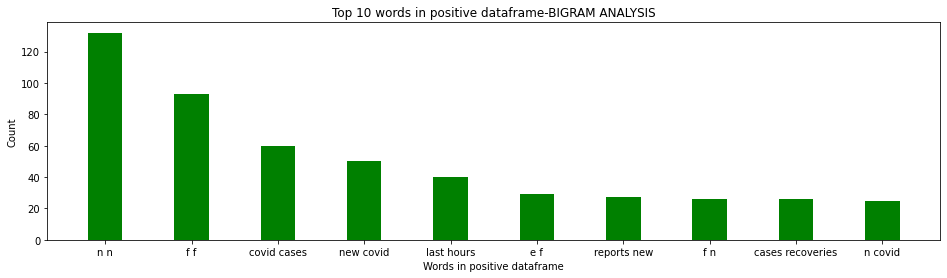

In [85]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

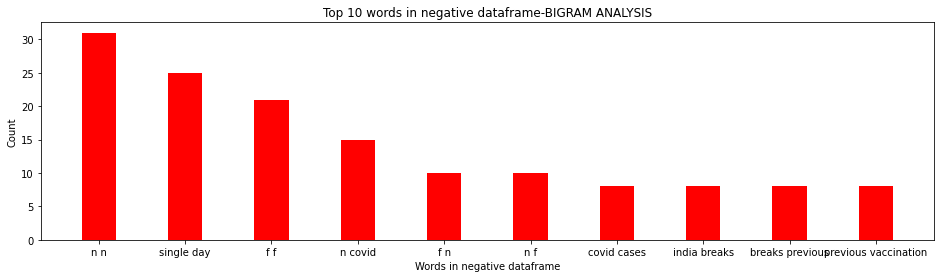

In [86]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

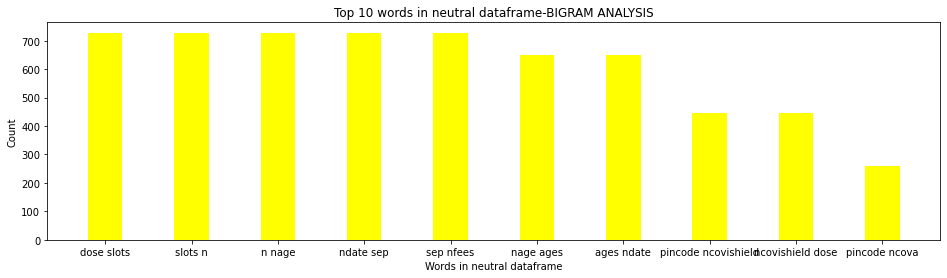

In [87]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [88]:


positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['largestvaccinedrive', 'nwomen', 'braces', 'incessant', 'rains', 'que', 'large', 'numbers', 'covid', 'vaccination', 'camp']
Sentence after removing stopwords: ['love', 'thy', 'neighbour', 'thyself', 'keep', 'safe', 'n', 'c', 'e', 'n', 'guwahati', 'assam']
Sentence after removing stopwords: ['able', 'leadership', 'pm', 'ji', 'covid', 'vaccination', 'drive', 'going', 'steady', 'pace', 'c']
Sentence after removing stopwords: ['want', 'future', 'normal', 'nmake', 'pledge', 'always', 'wear', 'leeford', 'n', 'mask', 'outside', 'follow', 'smarter']
Sentence after removing stopwords: ['new', 'record', 'f', 'nno', 'government', 'leadership', 'world', 'even', 'think', 'nthe', 'numbers', 'speak', 'th']
Sentence after removing stopwords: ['great', 'welcome', 'third', 'wave', 'coronavirus', 'nban', 'diwali', 'ban', 'temples', 'nbut', 'conduct']
Sentence after removing stopwords: ['imho', 'ask', 'wet', 'lease', 'local', 'trains', 'run', 'best', 'bu']
Sentence afte

Sentence after removing stopwords: ['valuations', 'indian', 'amp', 'ites', 'firms', 'reach', 'five', 'year', 'high', 'usd', 'million', 'inc', 'transaction', 'valu']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages']
Sentence after removing stopwords: ['india', 'reported', 'great', 'decline', 'various', 'kinds', 'respiratory', 'diseases', 'e', 'luding', 'covid', 'people']
Sentence after removing stopwords: ['india', 'administers', 'crore', 'lakh', 'doses', 'covidvaccine', 'far', 'nationwidevaccinationdrive', 'n', 'covid']
Sentence after removing stopwords: ['according', 'estimates', 'covid', 'pandemic', 'impacted', 'msme', 'earnings', 'per', 'cent', 'main', 'problem', 'fa']
Sentence after removing stopwords: ['delhi', 'reports', 'deaths', 'new', 'covid', 'cases', 'recoveries', 'last', 'hours', 'total', 'cases', 'rise']
Sentence after removing stopwords: ['coronaupdatesinindia', 'n', 'september', 'mohfw', 'n', 'n', 'total', 'c

Sentence after removing stopwords: ['india', 'touring', 'new', 'zealand', 'later', 'year', 'due', 'packed', 'calendar', 'amp', 'covid', 'related', 'restrictions']
Sentence after removing stopwords: ['nagaland', 'new', 'cases', 'pushed', 'nagaland', 'covid', 'tally', 'one', 'fresh', 'fatality', 'took', 'death', 'toll']
Sentence after removing stopwords: ['fibromyalgia', 'prominent', 'feature', 'post', 'acute', 'covid', 'syndrome', 'spectrum', 'obesity', 'male', 'gender', 'synergist']
Sentence after removing stopwords: ['union', 'health', 'minister', 'ji', 'cut', 'cake', 'amp', 'celebrated', 'benchmark', 'cr', 'covid', 'vaccines', 'administer']
Sentence after removing stopwords: ['mobile', 'medical', 'services', 'first', 'wave', 'pandemic', 'underprivileged', 'sections', 'society', 'across', 'rural']
Sentence after removing stopwords: ['want', 'die', 'cancer', 'smoking', 'right', 'smoking', 'around']
Sentence after removing stopwords: ['india', 'ready', 'partner', 'interested', 'countrie

Sentence after removing stopwords: ['use', 'blended', 'learning', 'model', 'adjustment', 'holiday', 'schedules', 'important', 'steps', 'undertaken']
Sentence after removing stopwords: ['results', 'received', 'new', 'cases', 'covid', 'detected', 'nagaland']
Sentence after removing stopwords: ['may', 'liquor', 'shops', 'opened', 'mumbai', 'first', 'time', 'nationwide', 'lockdown', 'announce']
Sentence after removing stopwords: ['th', 'gst', 'council', 'announces', 'people', 'friendly', 'measures', 'e', 'ends', 'rate', 'concessions', 'covid', 'amp', 'drugs', 'n', 'read']
Sentence after removing stopwords: ['e', 'erts', 'still', 'advise', 'mask', 'wearing', 'amp', 'say', 'safe', 'effective', 'n', 'n', 'face', 'masks', 'cause', 'hypo', 'bacterial', 'pne']
Sentence after removing stopwords: ['india', 'crosses', 'landmark', 'cr', 'covid', 'vaccination', 'pm', 'set', 'cross', 'cr', 'day', 'mark', 'special', 'drive']
Sentence after removing stopwords: ['sikkim', 'covid', 'update', 'new', 'cases

Sentence after removing stopwords: ['anyone', 'hoping', 'see', 'light', 'end', 'covid', 'tunnel', 'ne', 'three', 'six', 'months', 'scientists']
Sentence after removing stopwords: ['covid', 'management', 'amp', 'india', 'economic', 'industrial', 'amp', 'social', 'refurbishment', 'must', 'go', 'hand', 'hand']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'recoveries', 'last', 'hours', 'per', 'union', 'health', 'ministry', 'n', 'na']
Sentence after removing stopwords: ['spotted', 'looks', 'adorable', 'crop', 'top', 'amp', 'jeans', 'steps', 'shopping', 'spree', 'f', 'f', 'n', 'n', 'shrutihaasan']
Sentence after removing stopwords: ['dro', 'tested', 'ffp', 'n', 'mask', 'meltblown', 'ready', 'sale', 'attractive', 'price', 'manufacturer', 'n', 'n', 'mor']
Sentence after removing stopwords: ['india', 'records', 'new', 'covid', 'cases', 'deaths', 'hours']
Sentence after removing stopwords: ['capital', 'city', 'andaman', 'amp', 'nicobar', 'portblair', 'entryway

Sentence after removing stopwords: ['new', 'covid', 'cases', 'deaths', 'reported', 'last', 'hours', 'india', 'kerala', 'recorded', 'covid', 'ca']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncovishield', 'dose', 'slots', 'n', 'nage']
Sentence after removing stopwords: ['join', 'space', 'largestvaccinedrive', 'n', 'appeals', 'eligible', 'people', 'cachar', 'take', 'first', 'second', 'dose']
Sentence after removing stopwords: ['fabulous', 'continue', 'till', 'every', 'citizen', 'india', 'done', 'vaccination']
Sentence after removing stopwords: ['true', 'suffering', 'diseases', 'covid']
Sentence after removing stopwords: ['proud', 'moment', 'india', 'n', 'n', 'covid', 'covidvaccination', 'n', 'coronadebat', 'modihaitohmumkinhai', 'corona']
Sentence after removing stopwords: ['one', 'thing', 'sure', 'none', 'political', 'parties', 'whether', 'power', 'opposition', 'gives', 'damn', 'covid']
Sentence after removing stopwords: ['cr', 'doses', 'covid', 'vaccine', 'administere

Sentence after removing stopwords: ['update', 'newly', 'detected', 'covid', 'cases', 'last', 'n', 'hrs', 'bmc', 'area', 'n', 'th', 'september', 'till']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'last', 'hours']
Sentence after removing stopwords: ['world', 'largest', 'vaccination', 'drive', 'full', 'swing', 'n', 'nindia', 'administers', 'cr', 'million']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages']
Sentence after removing stopwords: ['biharfightscorona', 'nupdate', 'day', 'n', 'e', 'f', 'f', 'covid', 'cases', 'reported', 'far', 'th', 'september']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'per', 'health', 'ministry']
Sentence after removing stopwords: ['covid', 'undone', 'much', 'progress', 'made', 'latinamerica', 'caribbean', 'countries', 'education']
Sentence after removing stopwords: ['huge', 'professi

Sentence after removing stopwords: ['ability', 'practice', 'socialdistancing', 'still', 'remains', 'privilege', 'rich', 'afford', 'separate', 'household']
Sentence after removing stopwords: ['cabinet', 'secretary', 'rajiv', 'gauba', 'chairs', 'high', 'level', 'meet', 'states', 'uts', 'public', 'health', 'response', 'covid', 'prog']
Sentence after removing stopwords: ['real', 'fears', 'potential', 'third', 'wave', 'n', 'nwhat', 'make', 'situation', 'pandemic', 'abates', 'virus']
Sentence after removing stopwords: ['thank', 'amp', 'frontlineworkers', 'covid', 'covidvaccine', 'nhuge', 'crore', 'population', 'many', 'countries', 'li']
Sentence after removing stopwords: ['unprecedented', 'look', 'way', 'numbers', 'going', 'covid', 'corona']
Sentence after removing stopwords: ['biharfightscorona', 'nupdate', 'day', 'n', 'e', 'f', 'f', 'covid', 'cases', 'reported', 'far', 'th', 'september']
Sentence after removing stopwords: ['fight', 'corona', 'vr', 'available', 'n', 'ue', 'unrealengine', 'i

Sentence after removing stopwords: ['ttbs', 'offered', 'fle', 'ble', 'solution', 'worry', 'free', 'research', 'production', 'last', 'mile', 'connectivity', 'enable']
Sentence after removing stopwords: ['depending', 'mask', 'worn', 'mask', 'maintained', 'one', 'easily', 'tell', 'much', 'shits', 'pers']
Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'one', 'death', 'last', 'hours', 'active', 'cases']
Sentence after removing stopwords: ['india', 'set', 'create', 'new', 'record', 'today', 'covid', 'vaccination', 'almost', 'cr', 'done']
Sentence after removing stopwords: ['toppcell', 'new', 'interactive', 'singlecell', 'portal', 'creates', 'first', 'covid', 'immune', 'signature', 'atlas', 'n', 'nlearn']
Sentence after removing stopwords: ['crore', 'vaccines', 'single', 'day', 'number', 'phenomenal', 'help', 'lot', 'fight']
Sentence after removing stopwords: ['check', 'today', 'vaccination', 'numbers', 'live', 'f', 'n', 'covidvaccine']
Sentence

In [89]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['long', 'time', 'comprehensive', 'thread', 'covidvaccine', 'situation', 'make']
Sentence after removing stopwords: ['meanwhile', 'usa', 'deep', 'red', 'worst', 'situation', 'n', 'n', 'covid']
Sentence after removing stopwords: ['sonu', 'sood', 'help', 'covid', 'ppl', 'probe', 'hc', 'order', 'giving', 'vaccines', 'illegally', 'nkerjiwal', 'said', 'govt', 'inti']
Sentence after removing stopwords: ['urged', 'fda', 'accepted', 'wah', 'wah', 'mercantile', 'propaganda', 'n', 'nsay', 'vaccinated', 'unethica']
Sentence after removing stopwords: ['push', 'greener', 'electricvehicles', 'forget', 'contribution', 'conventional', 'vehicles', 'ind']
Sentence after removing stopwords: ['covid', 'changed', 'game', 'travel', 'tourism', 'sector', 'n', 'travel']
Sentence after removing stopwords: ['fake', 'vaccination', 'certificate', 'available', 'telegram', 'rs', 'check', 'point', 'covid', 'coronavirus']
Sentence after removing stopwords: ['first', 'see', 'going', '

Sentence after removing stopwords: ['average', 'people', 'see', 'inside', 'hospital', 'public', 'place', 'wear', 'mask', 'nose']
Sentence after removing stopwords: ['covid', 'update', 'f', 'f', 'n', 'n', 'c', 'active', 'cases', 'account', 'total', 'cases', 'n', 'n', 'c', 'india', 'active', 'caseload', 'stands', 'n', 'n', 'c']
Sentence after removing stopwords: ['reduction', 'cases', 'recorded', 'active', 'covid', 'caseload', 'span', 'hours', 'n', 'n', 'covid']
Sentence after removing stopwords: ['n', 'nwhy', 'reduction', 'rtpcr', 'tests', 'done', 'past', 'days']
Sentence after removing stopwords: ['kerala', 'records', 'new', 'covid', 'cases', 'samples', 'sent', 'testing', 'past', 'hours', 'test', 'po']
Sentence after removing stopwords: ['entitled', 'long', 'wore', 'mask', 'nthe', 'younger', 'woman', 'election', 'manager', 'alisa', 'keane']
Sentence after removing stopwords: ['fate', 'children', 'seen', 'secondary', 'needs', 'adults', 'material', 'non', 'material', 'needs']
Sentence af

Sentence after removing stopwords: ['pm', 'modi', 'birthday', 'india', 'completed', 'vaccinations', 'single', 'day', 'n', 'n']
Sentence after removing stopwords: ['cucumber', 'face', 'mask', 'dry', 'skin', 'e', 'apply', 'e', 'e', 'f', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'facemask', 'radhiradhikha', 'beautytips']
Sentence after removing stopwords: ['height', 'people', 'still', 'dont', 'wear', 'mask', 'silly', 'e', 'uses', 'make', 'f', 'please', 'mask', 'put', 'others', 'life', 'risk', 'f', 'f', 'n', 'maskup']
Sentence after removing stopwords: ['covid', 'digitalpolice', 'already', 'appealed', 'illegal', 'censorship', 'clear', 'evidence', 'direct']
Sentence after removing stopwords: ['students', 'bangladesh', 'aged', 'start', 'getting', 'us', 'made', 'pfizer', 'covid', 'vaccine', 'ne', 'days']
Sentence after removing stopwords: ['request', 'opposition', 'stay', 'away', 'grotesque', 'ideologies', 'people', 'af']
Sentence after removing stopwords: ['icymi', 'f', 'f', 'covid', 'pandemic

In [90]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'bella']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'manyata', 'clinic', 'ye']
Sentence after removing stopwords: ['concessional', 'gst', 'rates', 'covid', 'related', 'drugs', 'e', 'ended', 'till', 'december', 'says', 'nirmala', 'sitharaman', 'n', 'n', 'gst', 'covid']
Sentence after removing stopwords: ['till', 'friday', 'afternoon', 'india', 'vaccinated', 'crore', 'people', 'covid', 'fourth', 'time', 'country', 'p']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrainbowhos']
Sentence after removing stopwords: ['cr', 'still', 'counting', 'ngreat', 'work', 'medical', 'frontline', 'warrior', 'f', 'f', 'n', 'n', 'covid', 'covishield', 'cova', 'n']
Sentence after removing stopwords: ['india', 'adm

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ntotal']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrakshobhya']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nshobha', 'ho']
Sentence after removing stopwords: ['india', 'uk', 'working', 'together', 'tackle', 'global', 'challenges', 'covid', 'regional', 'security', 'prosperity']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cl']
Sentence after removing stopwords: ['ppl', 'power', 'authority', 'want', 'wear', 'mask', 'try', 'justify', 'giving', 'illogical', 'reasons']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospi']
Sente

Sentence after removing stopwords: ['day', 'f', 'e', 'f', 'covid', 'update', 'per', 'india', 'n', 'nactive', 'cases', 'f', 'n', 'nr', 'rate', 'f', 'c', 'nf', 'rate', 'f', 'f']
Sentence after removing stopwords: ['india', 'crosses', 'landmark', 'cr', 'covid', 'vaccination', 'pm', 'set', 'cross', 'record', 'cr', 'vaccinations', 'mark']
Sentence after removing stopwords: ['uk', 'seeing', 'shortage', 'food', 'amp', 'might', 'become', 'permanent', 'know', 'amp', 'caused', 'problem']
Sentence after removing stopwords: ['second', 'wave', 'covid', 'spread', 'across', 'nation', 'volunteers', 'came', 'aid', 'familie']
Sentence after removing stopwords: ['sharing', 'thoughts', 'amp', 'wrote', 'research', 'study', 'actions', 'aspiring']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'n

Sentence after removing stopwords: ['report', 'e', 'lains', 'brazil', 'covid', 'challenge', 'symptom', 'deeper', 'cascading', 'crises']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'rajesh']
Sentence after removing stopwords: ['biden', 'administration', 'negotiating', 'pfizer', 'buy', 'additional', 'million', 'covid', 'vaccines', 'donate', 'g']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nrainbow', 'royal', 'meenakshi']
Sentence after removing stopwords: ['gst', 'sops', 'covid', 'medicines', 'continue', 'n', 'n', 'gstcouncil', 'nirmalasitharaman', 'covid', 'financeminister', 'n', 'nread']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ag

Sentence after removing stopwords: ['ssp', 'shir', 'ips', 'jkp', 'alongs', 'dc', 'srinagar', 'surprise', 'inspection', 'conduct']
Sentence after removing stopwords: ['bmc', 'says', 'mumbaikars', 'antibodies', 'covid', 'per', 'th', 'sero', 'survey', 'conducted', 'bmc', 'juris']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsantosh', 'h']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naarthi', 'scan']
Sentence after removing stopwords: ['thursday', 'cowin', 'dashboard', 'amp', 'india', 'figures', 'n', 'n', 'covid', 'cases', 'nno', 'vaccinated', 'n', 'st', 'dose']
Sentence after removing stopwords: ['area', 'sales', 'developer', 'manager', 'n', 'maa', 'uttarpradesh', 'jo', 'covid', 'marketing', 'hiring', 'medical']
Sentence after removing stopwords: ['airlines', 'operate', 'pre', 'covid', 'domestic', 'flights', 'n', 'airlines', 'co

Sentence after removing stopwords: ['global', 'gold', 'mining', 'market', 'e', 'ected', 'grow', 'billion', 'cagr', 'according']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncloudnine']
Sentence after removing stopwords: ['india', 'leading', 'globe', 'worldsfastestvaccinedrive', 'n', 'n', 'n', 'covid', 'vaccine', 'doses', 'administere']
Sentence after removing stopwords: ['newsalert', 'covid', 'nno', 'need', 'covid', 'booster', 'doses', 'india', 'stage', 'say', 'e', 'erts']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'natreum', 'h']
Sentence after removing stopwords: ['char', 'dham', 'yatra', 'starts', 'today', 'ndetails', 'covid', 'rtpcrtest']
Sentence after removing stopwords: ['appro', 'mately', 'total', 'population', 'age', 'seychelles', 'striving', 'provide', 'futu']
Sentence after removing stopwords: ['pincode', 'ncovishi

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmedihope', 'ho']
Sentence after removing stopwords: ['royal', 'challengers', 'bangalore', 'skipper', 'virat', 'kohli', 'unveiled', 'blue', 'jerseys', 'resembling', 'colour', 'ppe', 'kits', 'frontline', 'wa']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nessentia']
Sentence after removing stopwords: ['reopening', 'schools', 'india', 'must', 'follow', 'one', 'size', 'fits', 'model', 'based', 'conte']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmga', 'hospi']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nunity', 'li']
Sentence after removing stopwords: ['covid', 'pandemic', 'conducting', 'offline', 'e', 'ms', 'students', 'en

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nunited', 'hospital', 'jayanag']
Sentence after removing stopwords: ['upcoming', 'trends', 'technologies', 'baggage', 'handling', 'system', 'market', 'n', 'nview', 'detail', 'toc']
Sentence after removing stopwords: ['disability', 'acts', 'india', 'part', 'f', 'f', 'c', 'f', 'f', 'occupationaltherapy', 'physiotherapy']
Sentence after removing stopwords: ['telangana', 'vaccinated', 'lakh', 'people', 'today', 'covid', 'nmajor', 'boost', 'second', 'dose', 'administration']
Sentence after removing stopwords: ['us', 'fda', 'pfizer', 'booster', 'shots', 'approved', 'people', 'n', 'n', 'covid', 'boostershot', 'usfda']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'sunny']
Sentence after removing stopwords: ['reminder', 'us', 'uk', 'israel', 'wait', 'pm', 'birthday', 'vaccinate', 'citizens', 's

Sentence after removing stopwords: ['doubt', 'remember', 'everyone', 'doubt', 'seeing', 'similarity', 'remove', 'fear']
Sentence after removing stopwords: ['workspace', 'metaverse', 'zoom', 'burnout', 'ncompanies', 'co', 'working', 'metaverse', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'sunny']
Sentence after removing stopwords: ['mumbaiindians', 'take', 'chennaisuperkings', 'crunch', 'clash', 'dubai', 'sunday', 'mark', 'resumption', 'ipl']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospital']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nshobha', 'ho']
Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrakshobh']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nneighbour']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'manyata', 'clinic', 'ye']
Sentence after removing stopwords: ['f', 'aupdate', 'covid', 'vaccine', 'availability', 'states', 'uts', 'n', 'n', 'f', 'amore', 'crore', 'vaccine', 'doses', 'provided', 'states', 'uts']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['covid', 'f', 'e', 'f', 'update', 'n', 'ntotal', 'n', 'ncases', 'nactive', 'nrecoveries', 'n', 'f', 'ntes']
Sentence after removing stopwords: ['sep', 'jammuandkashmir', 'covid', 'update', 'n', 'nactive', 'cases', 'f', 'n', 'ntpr', 'c', 'n', 'nrr', 'f', 'cfr', 'f', 'f']
Sentence after removing stopwords: ['given', 'metros', 'way', 'covid', 

Sentence after removing stopwords: ['safety', 'hands', 'n', 'india', 'n', 'india', 'india', 'n']
Sentence after removing stopwords: ['logging', 'covid', 'cases', 'thursday', 'highest', 'days', 'tricity', 'saw', 'daily', 'case', 'count', 'fall', 'seven']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ntenet', 'diagn']
Sentence after removing stopwords: ['reopening', 'schools', 'india', 'must', 'follow', 'one', 'size', 'fits', 'model', 'based', 'conte']
Sentence after removing stopwords: ['aai', 'airports', 'southern', 'region', 'india', 'regaining', 'confidence', 'flyers', 'th', 'september']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nblock', 'z']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nblossom']
Sentence after removing stopwords: ['delhi', 'r

Sentence after removing stopwords: ['odisha', 'govt', 'announces', 'commencement', 'physicalclasses', 'ugfirstyear', 'students', 'sept', 'n', 'n', 'covid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkanva', 'dia']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'c']
Sentence after removing stopwords: ['photos', 'citizens', 'receive', 'covid', 'vaccination', 'across', 'india', 'n']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'manyata', 'clinic', 'c']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'ho']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsanjeevin']
Sentence af

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnarayana']
Sentence after removing stopwords: ['tax', 'department', 'said', 'mr', 'sonu', 'sood', 'non', 'profit', 'raised', 'crore', 'overseas', 'donors', 'n', 'n', 'n', 'n', 'sonusood']
Sentence after removing stopwords: ['indoor', 'game', 'working', 'home', 'keep', 'fit', 'well', 'mood', 'f', 'f', 'f', 'f', 'n', 'jaehyun', 'covid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['spjimr', 'prof', 'jayaraman', 'article', 'published', 'wwm', 'writes', 'evolution', 'supply', 'chain', 'man']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nvalens', 'ho']
Sentence after removing stopwords: ['india', 'leading', 'globe', 'worldsfastestvaccinedrive', 'n', 'n', '

Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naddresshe']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmilann', 'hosp']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nadd', 'sc']
Sentence after removing stopwords: ['covid', 'india', 'administered', 'crore', 'daily', 'vaccinations', 'till', 'pm', 'today', 'n', 'n', 'data', 'source', 'cowin']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'hea']
Sentence after removing stopwords: ['study', 'made', 'observation', 'physicians', 'classify', 'patients', 'n', 'n', 'covid', 'n']
Sentence after removing stopwords: ['southwest']
Sentence after removing stopwords: ['despite', 'pandemic', 'nepal', 'goes', 'ahead', 'class

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsakra', 'premium', 'clinic', 'p', 'w']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['ninety', 'three', 'lakh', 'amp', 'counting', 'n', 'nas', 'india', 'celebrates', 'birthday', 'pm', 'world']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nshaker', 'nu']
Sentence after removing stopwords: ['e', 'erts', 'suggested', 'opening', 'gates', 'delhimetro', 'stations', 'reduce', 'congestion', 'commuters']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsantosh', 'h']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsp

Sentence after removing stopwords: ['try', 'drown', 'anyone', 'river', 'try', 'save', 'people', 'drowning', 'motivation', 'lufc', 'lisa', 'lanat']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nartyem', 'ho']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkanva', 'dia']
Sentence after removing stopwords: ['dimapur', 'district', 'administration', 'today', 'handed', 'ex', 'gratia', 'rs', 'lakhs', 'family', 'members', 'frontline', 'w']
Sentence after removing stopwords: ['maharashtra', 'covid', 'data', 'sept', 'n', 'ncases', 'nnew', 'ntotal', 'ndeaths', 'nnew', 'ntotal', 'n', 'ntests', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nlakshmi']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate',

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspringle']
Sentence after removing stopwords: ['update', 'covid', 'vaccine', 'availability', 'states', 'uts', 'n', 'n', 'f', 'crore', 'vaccine', 'doses', 'provided', 'states', 'uts']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospi']
Sentence after removing stopwords: ['things', 'bound', 'miss', 'leave', 'vizag', 'n', 'n', 'monsoonsinvizag', 'beach', 'latestnewsvizag', 'covid']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'sunny']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nbharathi']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west']
Sentence after removing stopwords: ['crore', 'covid', 'vaccinations', 'till', 'pm', 'today', 'level', 'inspiration', 'vaccination', 'recommend']
Sentence after removing stopwords: ['india', 'project', 'nomask']
Sentence after removing stopwords: ['global', 'covid', 'caseload', 'tops', 'million', 'n', 'n', 'latestnews', 'covid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nadd', 'sc']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncare', 'diag']
Sentence after removing stopwords: ['prior', 'pandemic', 'children', 'already', 'victims', 'violence', 'abuse', 'climatechange', 'impacts', 'covid']
Sentence after removing stopwords: ['satiesh', 'covid', 'suggested', 'government', 'india', 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'ayyap']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspringleaf']
Sentence after removing stopwords: ['zomato', 'started', 'pilot', 'minute', 'grocery', 'delivery', 'service', 'cities', 'starting', 'delhi', 'ncr', 'ju']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'clin']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napoorva', 'hos']
Sentence after removing stopwords: ['crore', 'vaccines', 'administered', 'today', 'cowin', 'covid', 'vaccinationdrive']
Sentence after removing stopwords: ['crore', 'vaccine', 'administered', 'till', 'pm', 'september', 'see', 'speed', 'vaccination', 'n', 'n', 'cova', 'n', 'cowin'

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'su']
Sentence after removing stopwords: ['shutting', 'schools', 'colleges', 'resulted', 'immense', 'learning', 'loss', 'students', 'covid', 'cases']
Sentence after removing stopwords: ['cr', 'pm', 'n', 'nbrilliant', 'n', 'n', 'india']
Sentence after removing stopwords: ['uk', 'days', 'still', 'news', 'pounds']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrakshobhya']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nvasavi', 'hosp']
Sentence after removing stopwords: ['covid', 'world', 'f', 'c', 'echart', 'n', 'nworld', 'f', 'c', 'dtotal', 'ncases', 'ndeath', 'f', 'n', 'f', 'nation', 'n', 'n', 'f', 'f', 'f']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage',

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cm', 'f']
Sentence after removing stopwords: ['tamil', 'nadu', 'cm', 'inspected', 'mass', 'covid', 'vaccination', 'drives', 'chennai', 'sunday', 'n', 'n', 'vaccinationdrive']
Sentence after removing stopwords: ['covid', 'india', 'administered', 'crore', 'daily', 'vaccinations', 'till', 'pm', 'today']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cm', 'f']
Sentence after removing stopwords: ['today', 'sarvodaya', 'bal', 'vidyalaya', 'ashok', 'nagar', 'delhi', 'electricity', 'problem', 'yesterday']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsai', 'thung']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu'

Sentence after removing stopwords: ['covid', 'world', 'map', 'assessment', 'countries', 'n', 'nsee']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsantosh', 'h']
Sentence after removing stopwords: ['covid', 'f', 'e', 'f', 'update', 'n', 'ntotal', 'n', 'ncases', 'nactive', 'nrecoveries', 'n', 'f', 'ntes']
Sentence after removing stopwords: ['karnataka', 'administers', 'lakh', 'doses', 'covid', 'vaccine', 'sept', 'till', 'pm', 'recording', 'highest', 'si']
Sentence after removing stopwords: ['lakh', 'covid', 'vaccine', 'doses', 'administered', 'india', 'today', 'record', 'cr', 'vaccinations']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkanva', 'dia']


In [91]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [127]:
df_positive3.to_csv("masktrigrampositive.csv",mode='a',index=False,header=False)

In [128]:
df_negative3.to_csv("masktrigramnegative.csv",mode='a',index=False,header=False)

In [129]:
df_neutral3.to_csv("masktrigramneutral.csv",mode='a',index=False,header=False)

In [142]:
df_positive3.to_csv("trigrammask.csv",mode='a',index=False,header=False)
df_negative3.to_csv("trigrammask.csv",mode='a',index=False,header=False)
df_neutral3.to_csv("trigrammask.csv",mode='a',index=False,header=False)

In [151]:
df5=pd.read_csv('trigrammask.csv',header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(11571, 2)

In [154]:
df5.to_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\final mask dataset\trigrammask.csv',index=False)

In [93]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [94]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [95]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

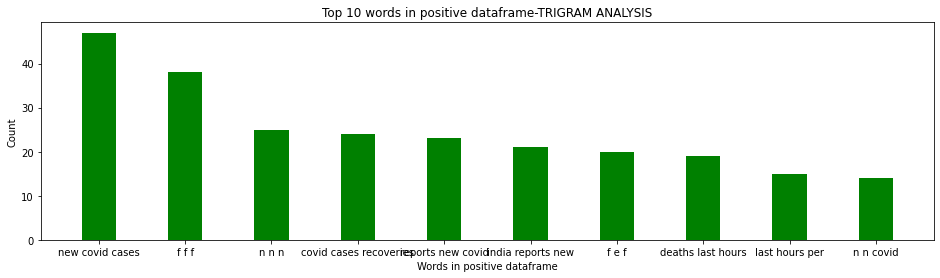

In [96]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

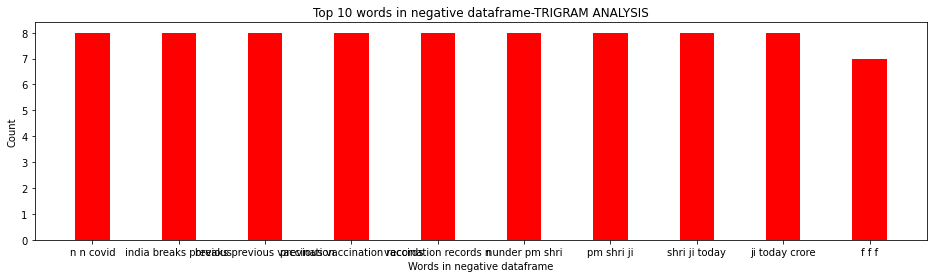

In [97]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

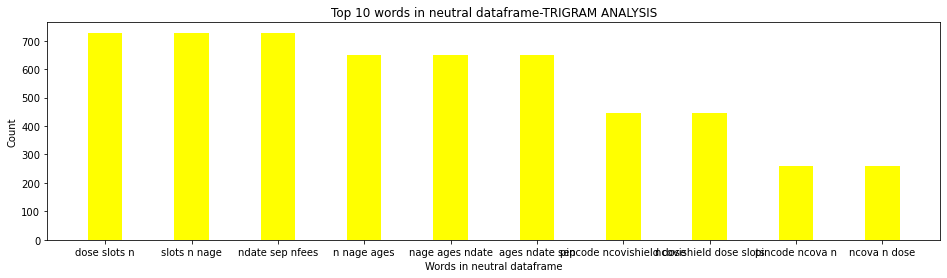

In [98]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

In [99]:
import csv
pp= (r"C:\Users\DELL\Desktop\mask covid19\mask dataset\INDIAMASKsentimentpythonclassification.csv")
names = ['created_at','text','screen_name','location','sentiment','polarity']
dataset1 = pd.read_csv(pp,names=names)
dataset1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\Desktop\\mask covid19\\mask dataset\\INDIAMASKsentimentpythonclassification.csv'

In [ ]:
clo=['created_at','text','screen_name','location', 'polarity','sentiment']
dataset3=dataset1.reindex(columns=clo)
dataset3.head()